In [2]:
import numpy as np
import scipy.ndimage
import matplotlib.pyplot as plt
import matplotlib.colors as colors
from astropy.io import fits
from lmfit import Model

import os
spec_dir = os.path.abspath("./../spec/") + "/"
plots_dir = os.path.abspath("./../plots/temp") + "/"

import sys
module_path = os.path.abspath("./../../module")
sys.path.append(module_path)
import redh3p as rhp

import warnings
from astropy.utils.exceptions import AstropyWarning
warnings.simplefilter("ignore", category=AstropyWarning)

##################


spec_dat = fits.open("h3p_spec_to_fit.fits", ignore_missing_end=True)[0].data
wave_to_fit = fits.open("h3p_wave_to_fit.fits", ignore_missing_end=True)[0].data

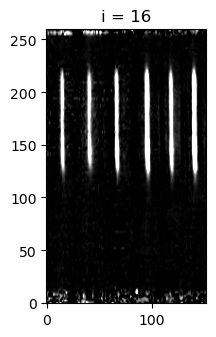

In [3]:
for i in range(16,17):

    fig = plt.figure(figsize=(6, 12), tight_layout=True)

    fig.add_subplot(131)
    plt.imshow(spec_dat[i],
               # extent=[waverange36[0],waverange36[1001],30,240],
               aspect="equal",
               cmap="gist_gray",
               # norm=colors.PowerNorm(gamma=0.4),
               vmin=0,
               vmax=0.001,
               origin="lower",
              )
    plt.title('i = '+str(i))

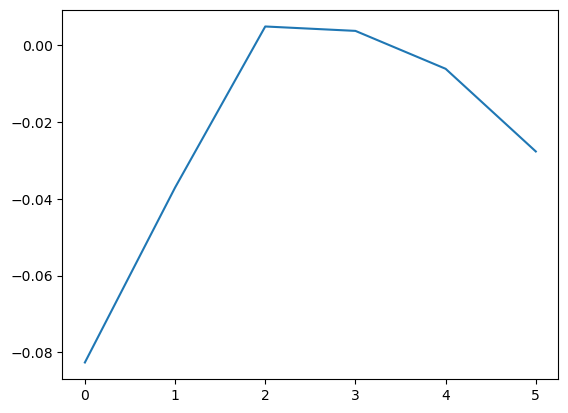

In [4]:
plt.plot(spec_dat[16][150][27:33] * 1e3, label="H$_2$ fit")

In [5]:
import h3ppy
import logging

logging.disable(logging.INFO)

# model2 = h2.model(dens = 3e25, temperature = 1000, R = 25000, wavelength = wave)

centers = [2.1223, 2.1278, 2.1315, 2.1349, 2.1381, 2.144]  # 2.1349
cpos = np.arange(6) * 25 + 15

h3p = h3ppy.h3p(line_list_file="h3p_line_list_neale_1996_subset_211_215.txt")

h3p_dens_map = []
h3p_dens_map_errs = []

h3p_temp_map = []
h3p_temp_map_errs = []

h3p_radiance_map = []
h3p_radiance_map_errs = []

wave = wave_to_fit

print("H3p LOOP START")
for fn in range(len(spec_dat)):
    # for fn in range(0,1):
    print()
    print("Frame Number = " + str(fn))
    print()    

    dens = np.zeros(301)
    dens_errs = np.zeros(301)

    temp = np.zeros(301)
    temp_errs = np.zeros(301)

    radiance = np.zeros(301)
    radiance_errs = np.zeros(301)

    # offset_0 = np.zeros(301)
    # sigma_0 = np.zeros(301)
    # background_0 = np.zeros(301)

    for i in range(80, 240):
        #     for i in range(120,122):
        spec = spec_dat[fn][i]

        model = h3p.model(density=2e16, temperature=1000, R=25000, wavelength=wave)

        h3p.set(wavelength=wave, data=spec, R=25000, density=3e16, temperature=1000)

        fit = h3p.fit(params_to_fit=["density", "temperature"])

        # em = h3p.total_emission()
        
        rad = np.sum(fit * (wave[1] - wave[0]))
        rad_errs = np.std(spec[22:32] * (wave[1] - wave[0]))

        # rad = np.sum(fit)
        # rad_errs = np.std(spec[22:32])

        vars, errs = h3p.get_results()

        xx = range(len(spec))

        if bool(vars) == False:
            print("i = " + str(i) + ", false fit")

            #             fig, ax = plt.subplots()
            #             ax.plot(xx, spec * 1e3, '-', label = 'Observation')
            #             ax.plot(xx, fit * 1e3, label = 'h3ppy H$_3^+$ fit')
            #             ax.plot(xx, model * 1e3, label = 'Model')
            #             ax.set(xlabel = h3p.xlabel(), ylabel = h3p.ylabel(prefix = 'm'), xticks = cpos, title = 'i = '+str(i))
            #             ax.set_xticklabels(centers)
            #             ax.legend(frameon = False)

            continue
        if bool(vars) == True:
            print(
                "i = "
                + str(i)
                + ", dens = "
                + str(vars["density"])
                + ", temp = "
                + str(vars["temperature"])
                + ", rad = "
                + str(rad)
            )

            #             fig, ax = plt.subplots()
            #             ax.plot(xx, spec * 1e3, '-', label = 'Observation')
            #             ax.plot(xx, fit * 1e3, label = 'h3ppy H$_3^+$ fit')
            #             ax.plot(xx, model * 1e3, label = 'Model')
            #             ax.set(xlabel = h3p.xlabel(), ylabel = h3p.ylabel(prefix = 'm'), xticks = cpos, title = 'i = '+str(i))
            #             ax.set_xticklabels(centers)
            #             ax.legend(frameon = False)

            dens[i] = vars["density"]
            dens_errs[i] = errs["density"]

            temp[i] = vars["temperature"]
            temp_errs[i] = errs["temperature"]

            radiance[i] = rad
            radiance_errs[i] = rad_errs

    h3p_dens_map.append(dens)
    h3p_dens_map_errs.append(dens_errs)

    h3p_temp_map.append(temp)
    h3p_temp_map_errs.append(temp_errs)

    h3p_radiance_map.append(radiance)
    h3p_radiance_map_errs.append(radiance_errs)

print("DONE")

h3p_density = np.array(h3p_dens_map)
h3p_temperature = np.array(h3p_temp_map)
h3p_density_errs = np.array(h3p_dens_map_errs)
h3p_temperature_errs = np.array(h3p_temp_map_errs)
h3p_radiance = np.array(h3p_radiance_map)
h3p_radiance_errs = np.array(h3p_radiance_map_errs)

/Users/RuoyanWang/anaconda3/lib/python3.11/site-packages/h3ppy
H3p LOOP START

Frame Number = 0

i = 80, dens = 1.6151339972157296e+16, temp = 661.8657380299414, rad = 5.571110776306868e-08
i = 81, dens = 1.3142393729410648e+16, temp = 685.4065879833876, rad = 6.446674240686306e-08
i = 82, dens = 6.038240713934599e+16, temp = 598.7220083688219, rad = 7.023503923838116e-08
i = 83, dens = 3.300637197058846e+16, temp = 643.4524862612827, rad = 8.483530609573364e-08
i = 84, dens = 2.4114195587455344e+16, temp = 670.350940699746, rad = 9.471542185243875e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, dens = 2.7791894426235012e+16, temp = 666.1810712607642, rad = 1.0245413371700847e-07
i = 86, dens = 3.235839310110964e+16, temp = 660.8707173347044, rad = 1.0990199014746012e-07
i = 87, dens = 5.429906731535064e+16, temp = 632.0376084925689, rad = 1.1526262848909251e-07
i = 88, dens = 5.825320330285468e+16, temp = 623.1826191356282, rad = 1.060700028706442e-07
i = 89, dens = 5.1106243494901144e+16, temp = 620.1077118782057, rad = 8.813552238235928e-08
i = 90, dens = 1.5315975711337245e+17, temp = 560.6149553831232, rad = 8.178773109941911e-08
i = 91, false fit
i = 92, dens = 9.632110641892712e+16, temp = 595.12916282323, rad = 1.0456517818917517e-07
i = 93, dens = 1.3761638045942256e+16, temp = 726.0828656765054, rad = 1.1725884466847431e-07
i = 94, dens = 1.1869763645853794e+16, temp = 730.5581835228628, rad = 1.070501292318432e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 95, dens = 5.822472995011294e+16, temp = 614.0855721220903, rad = 9.012917529823077e-08
i = 96, false fit
i = 97, false fit
i = 98, false fit
i = 99, dens = 1.4000458280131272e+16, temp = 737.8866166207827, rad = 1.383572551965133e-07
i = 100, dens = 9809815140133758.0, temp = 776.6167326125316, rad = 1.5248332401974012e-07
i = 101, dens = 1.5562456615655254e+16, temp = 742.4531268875114, rad = 1.6265416630589246e-07
i = 102, dens = 3.0752478111028292e+16, temp = 698.0274360046993, rad = 1.803401863284642e-07
i = 103, dens = 2.7878208406694816e+16, temp = 714.2103463763091, rad = 2.0356892990847602e-07
i = 104, dens = 1.5552890188963614e+16, temp = 771.71898257328, rad = 2.289067553372005e-07
i = 105, dens = 8746824891839688.0, temp = 836.1176040202014, rad = 2.498928271417338e-07
i = 106, dens = 7608735527928361.0, temp = 862.7234117248256, rad = 2.7713099639696703e-07
i = 107, dens = 1.0641161788114334e+16, temp = 838.6840253938389, rad = 3.1144715121875795e-07
i = 108, dens = 1.

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, dens = 1196483866386248.2, temp = 927.7935438041986, rad = 7.402355943421196e-08
i = 204, dens = 523102727908787.9, temp = 1028.4646161656997, rad = 6.34461267554351e-08
i = 205, false fit
i = 206, false fit
i = 207, dens = 306464794952084.94, temp = 1077.4009220774071, rad = 4.896199753668222e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 208, false fit
i = 209, false fit
i = 210, dens = 196794947652064.72, temp = 1060.207693077556, rad = 2.8636469953628692e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, dens = 1935148169677733.8, temp = 779.7109967443246, rad = 3.11238597909989e-08
i = 212, dens = 567958517984468.1, temp = 901.4148033474197, rad = 2.863727613846614e-08
i = 213, dens = 86910582574944.0, temp = 1000.90952572223, rad = 8.902492504292478e-09
i = 214, false fit
i = 215, false fit
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, dens = 95562593624228.0, temp = 1000.3811239139167, rad = 9.756051492551347e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, dens = 37573971696084.0, temp = 999.8595757845447, rad = 3.823295483742439e-09
i = 238, false fit
i = 239, false fit

Frame Number = 1

i = 80, dens = 1.7330675143436534e+16, temp = 703.5877300668346, rad = 1.0971578781822461e-07
i = 81, dens = 1.896346742235582e+16, temp = 698.1677137898384, rad = 1.1142328900442873e-07
i = 82, dens = 4.553451576918727e+16, temp = 641.2726612463402, rad = 1.1289913770145713e-07
i = 83, dens = 2.737777156343678e+16, temp = 677.8285650126687, rad = 1.2023772495308944e-07
i = 84, dens = 4.3108809394952056e+16, temp = 645.8069141764395, rad = 1.1516026705168383e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, false fit
i = 87, dens = 2.742472681003313e+16, temp = 665.4745122250264, rad = 1.0001202984299871e-07
i = 88, dens = 1.2334107022029852e+16, temp = 723.1545622097203, rad = 1.0122001211227487e-07
i = 89, dens = 9432806053940474.0, temp = 741.5398592488888, rad = 9.749628769062275e-08
i = 90, dens = 1.059872592726354e+16, temp = 725.7006278202346, rad = 8.986842918222544e-08
i = 91, dens = 8961421390911014.0, temp = 745.7070749870901, rad = 9.743300551234546e-08
i = 92, dens = 8385477922538289.0, temp = 768.20768546712, rad = 1.1862486005254462e-07
i = 93, dens = 1.0393861140553082e+16, temp = 765.655261517891, rad = 1.4282896671596807e-07
i = 94, dens = 1.0467994389100866e+16, temp = 769.1626303193332, rad = 1.4969442645660166e-07
i = 95, dens = 1.6295020064030184e+16, temp = 736.4424068038785, rad = 1.5818098379049008e-07
i = 96, dens = 2.604356391637246e+16, temp = 708.923723354741, rad = 1.772307982590693e-07
i = 97, dens = 2.6778861651031844e+16, temp = 7

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, dens = 1356788903466394.5, temp = 733.1638090636524, rad = 1.2643705462000776e-08
i = 214, false fit
i = 215, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 216, dens = 2184581751015961.2, temp = 675.4343930910742, rad = 9.259893396556949e-09
i = 217, false fit
i = 218, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, dens = 8567871378693780.0, temp = 582.3909652197417, rad = 7.230781760634481e-09
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, false fit
i = 225, false fit
i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, dens = 120363877969236.0, temp = 998.9709747026571, rad = 1.2178607368239669e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit
i = 233, dens = 129529703958520.0, temp = 999.5202089933676, rad = 1.3151800347654158e-08
i = 234, false fit
i = 235, false fit
i = 236, dens = 921721545100.0, temp = 999.9258321614577, rad = 9.38281820297581e-11


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 2

i = 80, dens = 2.4731053047657284e+16, temp = 660.7367758699955, rad = 8.38215660552808e-08
i = 81, dens = 1.2066403331681264e+16, temp = 711.2732486593601, rad = 8.473811905793926e-08
i = 82, dens = 1.2442435441835246e+16, temp = 716.3169250612709, rad = 9.341491527399174e-08
i = 83, dens = 1.148618641820006e+16, temp = 737.8485842273683, rad = 1.1345704889785828e-07
i = 84, dens = 1.4723452777886918e+16, temp = 720.9968007257443, rad = 1.1750486724177061e-07
i = 85, dens = 1.181240137618332e+16, temp = 738.0200796954153, rad = 1.1692659056544078e-07
i = 86, dens = 6772649916951572.0, temp = 798.4662593350384, rad = 1.3314395481542177e-07
i = 87, dens = 7153281765971163.0, temp = 809.8572124081118, rad = 1.580896896370058e-07
i = 88, dens = 5167165014776943.0, temp = 853.5674314300326, rad = 1.7343584860369695e-07
i = 89, dens = 3301930979042831.0, temp = 910.3312243381457, rad = 1.7867182242640077e-07
i = 90,

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, dens = 5938978128821388.0, temp = 710.3569846534489, rad = 4.119985594465563e-08
i = 203, false fit
i = 204, false fit
i = 205, dens = 364171149521836.2, temp = 935.8755478264895, rad = 2.392623575423896e-08
i = 206, dens = 393004417391892.44, temp = 920.9686216868497, rad = 2.3089598442265764e-08
i = 207, dens = 792000832669965.0, temp = 844.1444204072295, rad = 2.4390025740947868e-08
i = 208, dens = 1729609966090273.8, temp = 769.7303132707165, rad = 2.4892878574909744e-08
i = 209, dens = 1084070899351379.4, temp = 806.2742280362843, rad = 2.3101098055857278e-08
i = 210, dens = 442507076071696.75, temp = 884.807234991612, rad = 1.9479438671988972e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, dens = 26809076566020.0, temp = 1000.5481815542868, rad = 2.7398557426964716e-09
i = 212, dens = 30306555653700.0, temp = 1000.2005635194972, rad = 3.0904814408547676e-09
i = 213, false fit
i = 214, dens = 362146751652099.4, temp = 831.8784881594265, rad = 9.938118339454752e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, dens = 439189161420644.4, temp = 821.0357234403486, rad = 1.0850739655819511e-08
i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, dens = 13588888601804.0, temp = 1000.4040553222922, rad = 1.387500796947355e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit
i = 223, dens = 29277577161272.0, temp = 1000.0585367433127, rad = 2.98286762792287e-09
i = 224, dens = 31862806999888.0, temp = 1000.0399638336116, rad = 3.2458736460403807e-09
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, false fit
i = 228, dens = 112079167684784.0, temp = 999.4824719031063, rad = 1.1377242094001479e-08
i = 229, false fit
i = 230, false fit
i = 231, dens = 2237472410584.0, temp = 999.9573227294418, rad = 2.2781267587236958e-10


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, dens = 141836568298128.0, temp = 999.4698576099485, rad = 1.439678345331143e-08
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 3

i = 80, dens = 1.3702311834071242e+16, temp = 728.5115319235467, rad = 1.2041952329084568e-07
i = 81, dens = 1.912534956879974e+16, temp = 713.7934994252319, rad = 1.388865161260857e-07
i = 82, dens = 1.953457589016098e+16, temp = 726.3358095405357, rad = 1.6698685651345127e-07
i = 83, dens = 9853737365747442.0, temp = 801.394481941372, rad = 1.9970111400029078e-07
i = 84, dens = 1.1466979664288942e+16, temp = 795.0819816482882, rad = 2.1757384922084295e-07
i = 85, dens = 1.2488520383818064e+16, temp = 791.7665123224114, rad = 2.2879098284687822e-07
i = 86, dens = 1.2016475832641982e+16, temp = 800.7429977132281, rad = 2.4189398647361774e-07
i = 87, dens = 9276308270393150.0, temp = 834.9145227629073, rad = 2.6202105276628854e-07
i = 88, dens = 9828

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 204, dens = 762295834659334.2, temp = 786.4183398508679, rad = 1.3188462498824837e-08
i = 205, dens = 7190584349728324.0, temp = 611.5160032647964, rad = 1.0622132100876163e-08
i = 206, dens = 119078607652624.0, temp = 999.9547929337139, rad = 1.2124024351588212e-08
i = 207, false fit
i = 208, dens = 170383751724669.62, temp = 967.3372665065993, rad = 1.3994880535779076e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 209, dens = 679239614124562.8, temp = 800.3000816614174, rad = 1.3610533350720156e-08
i = 210, false fit
i = 211, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 212, false fit
i = 213, dens = 858658644709643.2, temp = 712.4515627296687, rad = 6.125443959842925e-09
i = 214, false fit
i = 215, dens = 6533892953004.0, temp = 1000.4463028187183, rad = 6.673253488830375e-10
i = 216, dens = 20593279401936.0, temp = 1000.0635534021322, rad = 2.098158293217009e-09
i = 217, false fit
i = 218, dens = 94636959853076.0, temp = 999.7930105817771, rad = 9.625608528355059e-09
i = 219, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, false fit
i = 231, false fit
i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 4

i = 80, dens = 1.5331189347371412e+16, temp = 776.0715960898203, rad = 2.3687205931982485e-07
i = 81, dens = 1.142244172605369e+16, temp = 811.7590002906481, rad = 2.5733257547857934e-07
i = 82, dens = 1.0048788793737192e+16, temp = 836.1780207660452, rad = 2.8725338439287487e-07
i = 83, dens = 1.0988770138191736e+16, temp = 842.4143464146996, rad = 3.330199172305236e-07
i = 84, dens = 1.4768324240175612e+16, temp = 825.1683580606104, rad = 3.799065207962008e-07
i = 85, dens = 1.5998262774576926e+16, temp = 832.6562847527836, rad = 4.4229791361636865e-07
i = 86, dens = 1.611176000515113e+16, temp = 847.4674534881999, rad = 5.11590218972264e-07
i = 87, dens = 1.4683811548397578e+16, temp = 876.8871231898423, rad = 6.046564909494718e-07
i = 88, dens = 1.6416446327522144e+16, temp = 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, dens = 37726761683468.0, temp = 1000.1550510777324, rad = 3.846039502727547e-09
i = 203, false fit
i = 204, dens = 148526350944316.0, temp = 999.1664253957249, rad = 1.5046798124931143e-08
i = 205, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 206, false fit
i = 207, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 208, false fit
i = 209, dens = 2396857064207678.0, temp = 666.9301351460712, rad = 8.937718951341522e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 210, false fit
i = 211, false fit
i = 212, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, false fit
i = 214, false fit
i = 215, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, false fit
i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, dens = 11357019095148.0, temp = 1000.0809497941086, rad = 1.157243512408562e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, dens = 204042987779423.9, temp = 866.5782939736257, rad = 7.687575298265602e-09
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, dens = 48879382509560.0, temp = 999.8944219493001, rad = 4.974764395252383e-09
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 5

i = 80, dens = 1.730681692733943e+16, temp = 842.2796959978244, rad = 5.238350515130996e-07
i = 81, dens = 1.840427041112787e+16, temp = 853.3175468446351, rad = 6.163467888393663e-07
i = 82, dens = 2.010856608367522e+16, temp = 862.530039514637, rad = 7.311605163581769e-07
i = 83, dens = 2.1469142241611548e+16, temp = 873.6009830970086, rad = 8.595834501828477e-07
i = 84, dens = 2.1103455713364508e+16, temp = 888.373252582581, rad = 9.569185966572544e-07
i = 85, dens = 1.948666183215827e+16, temp = 904.1550466572394, rad = 1.0042706287084105e-06
i = 86, dens = 1.8969636101020416e+16, temp = 908.214928523293, rad = 1.0095487776610783e-06
i = 87, dens = 1.8723462044235108e+16, temp = 906.6155432016512, rad = 9.839511631820528e-07
i = 88, dens = 1.8982205052877796e+16, temp = 898.3931920997654, rad = 9.341445329292176e-07
i = 89, dens = 2.0034633683015188e+16, temp = 884.6389984436513, rad = 8.806999842188664e-07
i = 90, dens = 1.9987502608574236e+16

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 184, dens = 511025205124459.75, temp = 1079.045151402777, rad = 8.2361015650967e-08
i = 185, dens = 623572553876601.6, temp = 1020.774614457702, rad = 7.222463524528036e-08
i = 186, dens = 15283316736548.0, temp = 1002.9030133352458, rad = 1.5853345818889896e-09
i = 187, false fit
i = 188, false fit
i = 189, dens = 256245328974788.53, temp = 1062.0013837913773, rad = 3.7658798973477895e-08
i = 190, dens = 1298553106002497.8, temp = 831.2145628083211, rad = 3.540979063040918e-08
i = 191, dens = 5566581067826630.0, temp = 698.1446068004495, rad = 3.269696034337566e-08
i = 192, dens = 6954209575728228.0, temp = 682.9581301951154, rad = 3.292426831395684e-08
i = 193, dens = 3952708543537376.0, temp = 731.5975545651997, rad = 3.611801456875113e-08
i = 194, dens = 2449704777112447.0, temp = 763.5800781487195, rad = 3.2872719833114256e-08
i = 195, dens = 1149087009078080.8, temp = 782.9239190570265, rad = 1.9141916309398206e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, dens = 1.0782447014249664e+16, temp = 576.379700374475, rad = 8.048210578064174e-09
i = 197, dens = 2534878190387318.0, temp = 682.0777579937734, rad = 1.1848474856984833e-08
i = 198, dens = 2718183408789569.5, temp = 684.6552197553659, rad = 1.3189505169433356e-08
i = 199, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 200, false fit
i = 201, false fit
i = 202, false fit
i = 203, false fit
i = 204, dens = 118684693643904.0, temp = 999.6415984680777, rad = 1.2059945666677606e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, false fit
i = 206, dens = 57809092967852.0, temp = 1000.0705730266309, rad = 5.890168993595345e-09
i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, false fit
i = 212, false fit
i = 213, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, dens = 1623512868431545.5, temp = 653.063685946323, rad = 4.8758844441021e-09
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, false fit
i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 6

i = 80, dens = 1.8399116980630044e+16, temp = 863.6674748654381, rad = 6.75743516999922e-07
i = 81, dens = 1.6642918753563384e+16, temp = 870.6970089186918, rad = 6.498912072351207e-07
i = 82, dens = 1.6139231196763944e+16, temp = 870.507750921982, rad = 6.291919433684611e-07
i = 83, dens = 1.6694791974969912e+16, temp = 864.9614711299804, rad = 6.201586478007901e-07
i = 84, dens = 1.7317727986256024e+16, temp = 856.7511429143548, rad = 5.981511126195589e-07
i = 85, dens = 1.7335348430895858e+16, temp = 850.4523503566149, rad = 5.656598142005937e-07
i = 86, dens = 1.5927871880108018e+16, temp = 854.9968879153455, rad = 5.415509548180765e-07
i = 87, dens = 1.3822492865536208e+16, temp = 869.0354375376288, rad = 5.32042634075378e-07
i = 88, dens = 1.2941682939239662e+16, temp = 875.5703240794454, rad = 5.26969596271111e-07
i = 89, dens = 1.3561879191236902e+16, temp = 869.5318820086308, rad = 5.242643390288992e-07
i = 90, dens = 1.5817273067175976e+1

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, dens = 80559791090376.0, temp = 999.8736937570989, rad = 8.198003834298663e-09
i = 191, false fit
i = 192, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, false fit
i = 194, false fit
i = 195, false fit
i = 196, false fit
i = 197, false fit
i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit
i = 202, dens = 92362678812176.0, temp = 999.4409110276542, rad = 9.373334186581596e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, false fit
i = 204, false fit
i = 205, false fit
i = 206, dens = 62093876925348.0, temp = 999.6903686831644, rad = 6.3115128425681444e-09
i = 207, false fit
i = 208, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 209, false fit
i = 210, dens = 1036946258190047.5, temp = 729.1985818514634, rad = 9.192644925803101e-09
i = 211, false fit
i = 212, false fit
i = 213, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, dens = 134299382476760.0, temp = 999.5832678813755, rad = 1.3641550966649361e-08
i = 218, false fit
i = 219, dens = 27113268524456.0, temp = 999.7086637807345, rad = 2.7562415763649395e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, dens = 42817178218620.0, temp = 999.6463275938438, rad = 4.350925322594079e-09
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, dens = 57110678263788.0, temp = 999.1187820798325, rad = 5.783977204096864e-09
i = 239, false fit

Frame Number = 7

i = 80, dens = 1.3538876978719302e+16, temp = 841.9083439768334, rad = 4.0837619208660733e-07
i = 81, dens = 1.3662218124872492e+16, temp = 841.6174467236369, rad = 4.1098219663138483e-07
i = 82, dens = 1.3675885990197134e+16, temp = 844.526782166658, rad = 4.2264683388488276e-07
i = 83, dens = 1.3443376017776048e+16, temp = 850.6868790912313, rad = 4.396003931364161e-07
i = 84, dens = 1.268427049382496e+16, temp = 861.7426038976943, rad = 4.580114575400271e-07
i = 85, dens = 1.2319569943751844e+16, temp = 869.1301535216573, rad = 4.7458362634656266e-07
i = 86, dens = 1.187597480322733e+16, temp = 874.8129786568122, rad = 4.804549749327815e-07
i = 87, dens = 1.1535229744970264e+16, temp = 877.4053516002372, rad = 4.771010788125326e-07
i = 88, dens = 1.2469750241100578e+16, temp = 871.4054525565099, rad = 4.899209642167907e-07
i = 89, dens = 1.

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, dens = 359608521083641.25, temp = 952.9399097544093, rad = 2.6723283048302413e-08
i = 180, false fit
i = 181, false fit
i = 182, false fit
i = 183, false fit
i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, false fit
i = 190, false fit
i = 191, dens = 86320586197936.0, temp = 999.8097861236373, rad = 8.780682393596152e-09
i = 192, dens = 670492367233100.0, temp = 724.4504964520927, rad = 5.594879843194688e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, false fit
i = 194, false fit
i = 195, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, false fit
i = 197, false fit
i = 198, dens = 2604693920957152.0, temp = 677.9770161174722, rad = 1.146438923984436e-08
i = 199, dens = 226252703265080.12, temp = 868.1843650769473, rad = 8.644538519059342e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 200, false fit
i = 201, false fit
i = 202, false fit
i = 203, false fit
i = 204, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, false fit
i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, dens = 557582274976424.0, temp = 762.7919418500682, rad = 7.414755060811733e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 210, dens = 147820285876496.0, temp = 999.6621010540589, rad = 1.5022460549195353e-08
i = 211, false fit
i = 212, false fit
i = 213, false fit
i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, false fit
i = 227, dens = 14491767135564.0, temp = 999.9464830404355, rad = 1.4754061478287065e-09
i = 228, false fit
i = 229, false fit
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 8

i = 80, dens = 8509907470950358.0, temp = 889.8530802111383, rad = 3.9061751719817895e-07
i = 81, dens = 8745352880574169.0, temp = 887.2454648133119, rad = 3.928643831805431e-07
i = 82, dens = 9946182525257194.0, temp = 876.1910765321293, rad = 4.0714711003212885e-07
i = 83, dens = 1.200282607750875e+16, temp = 859.188115299845, rad = 4.236940262928125e-07
i = 84, dens = 1.2998906373157556e+16, temp = 850.7228757220308, rad = 4.2520531265342765e-07
i = 85, dens = 1.2497968142904672e+16, temp = 852.6331133490748, rad = 4.159661028817818e-07
i = 86, dens = 9303850051430842.0, temp = 880.4222746374013, rad = 3.9476771786803244e-07
i = 87, dens = 6286505914757195.0, temp = 923.4592910898713, rad = 3.764105529005349e-07
i = 88, dens = 5407740379075525.0, temp = 938.1130685477749, rad = 3.611795486155943

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 166, dens = 6920811207641304.0, temp = 725.3441144204319, rad = 5.8415628906711546e-08
i = 167, false fit
i = 168, false fit
i = 169, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 170, false fit
i = 171, false fit
i = 172, false fit
i = 173, dens = 26508753162536.0, temp = 1000.5308596359662, rad = 2.7088659667236377e-09
i = 174, false fit
i = 175, dens = 35024337934676.0, temp = 1000.7326742378585, rad = 3.583629158059975e-09
i = 176, dens = 185609754039333.6, temp = 992.2459893495172, rad = 1.798871085102666e-08
i = 177, dens = 2702353453184366.0, temp = 721.0822034124643, rad = 2.1590806924096464e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 178, dens = 3038579021973257.0, temp = 751.9989087970265, rad = 3.562047810685433e-08
i = 179, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 180, false fit
i = 181, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, false fit
i = 183, false fit
i = 184, dens = 500553391745741.1, temp = 946.8225559512966, rad = 3.5610952950197826e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, false fit
i = 191, false fit
i = 192, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, false fit
i = 194, false fit
i = 195, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, false fit
i = 197, false fit
i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit
i = 202, dens = 39230014996356.0, temp = 1000.1057137509157, rad = 3.998039791927675e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, false fit
i = 204, false fit
i = 205, false fit
i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, false fit
i = 212, false fit
i = 213, false fit
i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, dens = 129032987894696.0, temp = 999.352045354122, rad = 1.3087391785339847e-08
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, dens = 242648927262751.0, temp = 858.9969544159261, rad = 8.550825226768996e-09
i = 232, dens = 432009997389350.44, temp = 837.8185639830153, rad = 1.25417622777541e-08
i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, dens = 63400304074364.0, temp = 999.4548747290523, rad = 6.434684551301629e-09

Frame Number = 9

i = 80, dens = 7312498526410417.0, temp = 884.5426330096344, rad = 3.21190623016926e-07
i = 81, dens = 6473933572971258.0, temp = 893.2543199013813, rad = 3.0557341920859877e-07
i = 82, dens = 6224323915515416.0, temp = 892.2260680509486, rad = 2.9133054591579394e-07
i = 83, dens = 6947957111856783.0, temp = 877.5305277596572, rad = 2.8767583829340875e-07
i = 84, dens = 7539958337737815.0, temp = 866.306478104285, rad = 2.834035151352274e-07
i = 85, dens = 6845813308465185.0, temp = 876.0399257953145, rad = 2.7987248907763767e-07
i = 86, dens = 5255813658317515.0, temp = 900.7045271546133, rad 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 160, false fit
i = 161, false fit
i = 162, dens = 73923772308828.0, temp = 999.5139307581533, rad = 7.505558460300774e-09
i = 163, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 164, false fit
i = 165, false fit
i = 166, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 167, dens = 4307823548285599.0, temp = 695.0051713568162, rad = 2.4219676230508748e-08
i = 168, false fit
i = 169, false fit
i = 170, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, false fit
i = 172, false fit
i = 173, false fit
i = 174, dens = 130406680058632.0, temp = 999.5138150748184, rad = 1.3240318414598011e-08
i = 175, false fit
i = 176, dens = 4605227235203762.0, temp = 690.8483918237531, rad = 2.4418256514795903e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 177, false fit
i = 178, false fit
i = 179, false fit
i = 180, false fit
i = 181, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, false fit
i = 183, false fit
i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, dens = 139674648296692.0, temp = 999.4627443211169, rad = 1.4176697556293971e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, false fit
i = 192, false fit
i = 193, false fit
i = 194, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 195, false fit
i = 196, false fit
i = 197, false fit
i = 198, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, false fit
i = 200, false fit
i = 201, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, false fit
i = 203, false fit
i = 204, false fit
i = 205, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit
i = 211, false fit
i = 212, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, false fit
i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, dens = 160629485134612.38, temp = 945.151493582784, rad = 1.1291207312147382e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, dens = 746006362062577.8, temp = 748.2028963111818, rad = 8.358202490012305e-09
i = 221, dens = 133470938762532.0, temp = 999.5185949260101, rad = 1.3551834750726156e-08
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, false fit
i = 231, false fit
i = 232, dens = 53672468130364.0, temp = 999.7675459466535, rad = 5.458195239743e-09
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, dens = 2157640486156323.8, temp = 636.92141955303, rad = 4.975073193966907e-09
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 10

i = 80, dens = 5666711483319836.0, temp = 859.1258469239712, rad = 1.9992145652711802e-07
i = 81, dens = 3004569558439084.5, temp = 929.5697741495337, rad = 1.8837634625019474e-07
i = 82, dens = 2580005158663359.5, temp = 945.5515105785737, rad = 1.818807448666542e-07
i = 83, dens = 5493468401770336.0, temp = 855.2094099040969, rad = 1.8713637678070953e-07
i = 84, dens = 7893075347591682.0, temp = 821.8585244133538, rad = 1.965898212441201e-07
i = 85, dens = 5119239658943316.0, temp = 870.6237614674709, rad = 1.997751808573042e-07
i = 86, dens = 3594056758700068.0, temp = 908.2680767078607, rad = 1.9135296734161142e-07
i = 87, dens = 3591806319920168.5, temp = 904.4955078580505, rad = 1.856102158390411e-07
i = 88, dens = 2922546153528528.5, temp = 923.1545705547289, rad = 1.745859284384

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 148, dens = 658251281869675.1, temp = 957.6338172984513, rad = 5.0557997457025134e-08
i = 149, dens = 659102136535220.1, temp = 944.94617768121, rad = 4.626207572213127e-08
i = 150, dens = 919608702658262.9, temp = 894.2967693573777, rad = 4.377688485619746e-08
i = 151, dens = 3329079698757835.5, temp = 747.8971333923948, rad = 3.716223447081395e-08
i = 152, false fit
i = 153, dens = 3504230002635282.5, temp = 733.3075500568937, rad = 3.2714151208941445e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 154, dens = 1104685818904415.2, temp = 857.7118756826216, rad = 3.848493570153228e-08
i = 155, dens = 1.2677513648483192e+16, temp = 664.9851109856223, rad = 4.588611064141849e-08
i = 156, false fit
i = 157, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 158, dens = 1050375743205080.0, temp = 800.8813347061854, rad = 2.1174623357846577e-08
i = 159, false fit
i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit
i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, false fit
i = 167, false fit
i = 168, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 169, false fit
i = 170, false fit
i = 171, false fit
i = 172, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, false fit
i = 174, false fit
i = 175, false fit
i = 176, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 177, false fit
i = 178, dens = 3351063160136645.0, temp = 670.1126865603271, rad = 1.3114958528263498e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, dens = 4601796706317877.0, temp = 649.7879915249033, rad = 1.3113313851949626e-08
i = 180, dens = 1484470771066968.2, temp = 756.3420612441872, rad = 1.83162172304627e-08
i = 181, false fit
i = 182, false fit
i = 183, false fit
i = 184, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 185, dens = 662822647048494.0, temp = 766.479769591654, rad = 9.194316465531324e-09
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, dens = 752722992140.0, temp = 1000.0116933320477, rad = 7.666634884493548e-11


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, false fit
i = 192, false fit
i = 193, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 194, false fit
i = 195, false fit
i = 196, false fit
i = 197, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, false fit
i = 203, false fit
i = 204, false fit
i = 205, dens = 110387737195968.0, temp = 999.2825447348459, rad = 1.1191326881284454e-08
i = 206, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit
i = 211, false fit
i = 212, false fit
i = 213, dens = 105946374343192.0, temp = 999.5799404010337, rad = 1.0761349485755735e-08
i = 214, false fit
i = 215, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 216, false fit
i = 217, false fit
i = 218, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, false fit
i = 220, dens = 53676754407776.0, temp = 999.6682614614202, rad = 5.455192618261985e-09
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, dens = 98562314919280.0, temp = 999.4019417917729, rad = 1.0000013937492815e-08
i = 228, dens = 123383925372212.0, temp = 999.1179699481789, rad = 1.249584208243566e-08
i = 229, dens = 17358631082988.0, temp = 999.7015114869388, rad = 1.7645385037971634e-09
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, dens = 115335225870488.0, temp = 999.3538242745605, rad = 1.1698203882942112e-08
i = 233, dens = 118477804968572.0, temp = 999.3689416332887, rad = 1.2018100634059447e-08
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, dens = 99813845936732.0, temp = 998.7274449141986, rad = 1.0083693884687479e-08

Frame Number = 11

i = 80, dens = 3563788469588978.0, temp = 886.5326374588378, rad = 1.5915020817595795e-07
i = 81, dens = 3297303052322110.5, temp = 896.649687282888, rad = 1.5999421218466258e-07
i = 82, dens = 4717034007618874.0, temp = 859.2661631840856, rad = 1.6662471716782518e-07
i = 83, dens = 5122842908062831.0, temp = 861.5663522251791, rad = 1.8469057647196027e-07
i = 84, dens = 5633204047040959.0, temp = 854.1260660411284, rad = 1.9003389306677394e-07
i = 85, dens = 4082002177143260.0, temp = 894.3189695384384, rad = 1.9435396999538697e-07
i = 86, dens = 4201567434219214.0, temp = 888.078566638149

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 145, dens = 579934380021752.2, temp = 873.1428535624995, rad = 2.312830495420017e-08
i = 146, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 147, dens = 2244114505086412.0, temp = 746.4111303989349, rad = 2.4607219545883694e-08
i = 148, dens = 367005864231151.44, temp = 952.0128456741198, rad = 2.7094572428350882e-08
i = 149, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 150, false fit
i = 151, false fit
i = 152, false fit
i = 153, dens = 148687724041812.0, temp = 1000.2675091434243, rad = 1.516871292690076e-08
i = 154, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 155, false fit
i = 156, false fit
i = 157, false fit
i = 158, false fit
i = 159, false fit
i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit
i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, dens = 4591893877189627.0, temp = 662.151363559765, rad = 1.590920991951789e-08
i = 166, false fit
i = 167, false fit
i = 168, false fit
i = 169, false fit
i = 170, false fit
i = 171, false fit
i = 172, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, false fit
i = 174, false fit
i = 175, false fit
i = 176, false fit
i = 177, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 178, false fit
i = 179, false fit
i = 180, false fit
i = 181, false fit
i = 182, false fit
i = 183, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, false fit
i = 191, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, false fit
i = 193, false fit
i = 194, false fit
i = 195, false fit
i = 196, false fit
i = 197, dens = 65856949985684.0, temp = 999.583829320423, rad = 6.689489240562451e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, dens = 53806110517216.0, temp = 999.7908556321198, rad = 5.472593365251615e-09
i = 202, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 203, false fit
i = 204, false fit
i = 205, dens = 22727626862244.0, temp = 999.746744907249, rad = 2.310969400367901e-09
i = 206, false fit
i = 207, false fit
i = 208, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 209, false fit
i = 210, false fit
i = 211, false fit
i = 212, dens = 15696516244740.0, temp = 999.932374949845, rad = 1.5979179995434966e-09
i = 213, false fit
i = 214, dens = 47328542619748.0, temp = 999.7787572425301, rad = 4.813395792316141e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, dens = 36361775260736.0, temp = 1000.3029039255612, rad = 3.7103628198139064e-09
i = 217, false fit
i = 218, dens = 43272571913404.0, temp = 999.7061255533697, rad = 4.3988693191800824e-09
i = 219, dens = 117566468446144.0, temp = 999.2487631759176, rad = 1.1916559319230365e-08
i = 220, dens = 121623697824904.0, temp = 999.2142904592512, rad = 1.2325108495988223e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, false fit
i = 227, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, dens = 591453228518135.8, temp = 740.3100062986842, rad = 6.0218498793673124e-09
i = 230, false fit
i = 231, dens = 193768815509260.25, temp = 918.565884464738, rad = 1.1176675835152255e-08
i = 232, dens = 243079447019875.8, temp = 878.6993787633496, rad = 1.0164860181445453e-08
i = 233, dens = 30128104143796.0, temp = 1000.3250146759655, rad = 3.0747082523256806e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, dens = 10158196324544.0, temp = 1000.4695781244949, rad = 1.0376386892342195e-09
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 12

i = 80, dens = 3426578466784764.5, temp = 855.316244675734, rad = 1.1683944211283634e-07
i = 81, dens = 2380287391368390.5, temp = 893.3956666720378, rad = 1.1248068275572871e-07
i = 82, dens = 3088788277356705.5, temp = 863.1569628934071, rad = 1.1293293032563465e-07
i = 83, dens = 4748885362544415.0, temp = 823.2874493075176, rad = 1.199440419767816e-07
i = 84, dens = 4680173511749413.0, temp = 830.0826938990689, rad = 1.2624567355908831e-07
i = 85, dens = 2575127215967339.5, temp = 900.5583589211816, rad = 1.2895319740742619e-07
i = 86, dens = 2014263170320890.5, temp = 932.3754474713298, rad = 1.2895603771526203e-07
i = 87, dens = 1488838261608634.8, temp = 972.5650454838575, rad = 1.267117068354512e-07
i = 88, dens = 1949048096420731.8, temp = 935.8775847584078, rad = 1.280553983

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 129, false fit
i = 130, false fit
i = 131, false fit
i = 132, false fit
i = 133, dens = 471842560656676.1, temp = 952.5872508981554, rad = 3.497627608420772e-08
i = 134, dens = 211980810406383.72, temp = 1075.8002276711538, rad = 3.3578554185007946e-08
i = 135, dens = 225730415925046.8, temp = 1038.2729592010044, rad = 2.9003223186806327e-08
i = 136, dens = 256109882555415.97, temp = 1010.5866380514198, rad = 2.787148776849181e-08
i = 137, dens = 19459350515384.0, temp = 1001.2807274460644, rad = 1.997959097332636e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 138, dens = 151091177895702.62, temp = 1037.022646669725, rad = 1.9272320782584683e-08
i = 139, false fit
i = 140, false fit
i = 141, dens = 195377811281592.75, temp = 1096.796911391381, rad = 3.454082017535114e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 142, false fit
i = 143, false fit
i = 144, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 145, false fit
i = 146, false fit
i = 147, false fit
i = 148, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 149, false fit
i = 150, false fit
i = 151, false fit
i = 152, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 153, false fit
i = 154, false fit
i = 155, false fit
i = 156, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 157, false fit
i = 158, false fit
i = 159, false fit
i = 160, false fit
i = 161, false fit
i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, false fit
i = 167, false fit
i = 168, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 169, false fit
i = 170, false fit
i = 171, dens = 130635280878948.0, temp = 999.3395808371017, rad = 1.3248862020789597e-08
i = 172, false fit
i = 173, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, false fit
i = 175, false fit
i = 176, dens = 44936249497932.0, temp = 1000.165865918969, rad = 4.58132356153684e-09
i = 177, false fit
i = 178, false fit
i = 179, false fit
i = 180, false fit
i = 181, false fit
i = 182, false fit
i = 183, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, false fit
i = 191, false fit
i = 192, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, false fit
i = 194, false fit
i = 195, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 196, false fit
i = 197, dens = 74700138207060.0, temp = 999.4292009829101, rad = 7.580298395499811e-09
i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit
i = 202, false fit
i = 203, false fit
i = 204, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, false fit
i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 210, false fit
i = 211, false fit
i = 212, dens = 22618005130940.0, temp = 999.9550071320618, rad = 2.3028629328958738e-09
i = 213, false fit
i = 214, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, dens = 944404173962946.2, temp = 731.9891693639039, rad = 8.672095245496031e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, dens = 2543776897023911.0, temp = 666.938468552741, rad = 9.486775910305106e-09
i = 226, dens = 207002216118481.25, temp = 864.6609718645101, rad = 7.669227849283036e-09
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, dens = 92098078215820.0, temp = 999.9221428461009, rad = 9.375054760442768e-09
i = 231, dens = 15824799538980.0, temp = 1000.247275573241, rad = 1.6141971409606555e-09
i = 232, false fit
i = 233, false fit
i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 13

i = 80, dens = 1.8849315659583356e+16, temp = 665.0382989163625, rad = 6.828060716723266e-08
i = 81, dens = 5877444103087957.0, temp = 759.0422207437197, rad = 7.484103352726003e-08
i = 82, dens = 2998747098052885.5, temp = 837.0030779771961, rad = 8.639147670102668e-08
i = 83, dens = 3047885249023197.5, temp = 848.3145289128028, rad = 9.753225242931004e-08
i = 84, dens = 3874991275690479.5, temp = 824.6219890190667, rad = 9.915361348607157e-08
i = 85, dens = 3879885965195204.0, temp = 819.7920187462436, rad = 9.469152919201112e-08
i = 86, dens = 2045767017211860.5, temp = 892.2490140997859, rad = 9.577046659932384e-08
i = 87, dens = 893334937307167.5, temp = 1011.9850971716005, rad = 9.806191409693088e-08
i = 88, dens = 803282247087313.6, temp = 1019.5479564689404, rad = 9.235081828472968e-08
i = 89, dens = 1419403628246953.5, temp = 926.1902359320773, rad = 8.67620016868

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 101, dens = 686924574177864.4, temp = 1007.0883050611012, rad = 7.314827817629492e-08
i = 102, dens = 352788665612939.94, temp = 1115.7622420940902, rad = 6.858471708554652e-08
i = 103, false fit
i = 104, dens = 43600096754336.0, temp = 1002.9912473971093, rad = 4.5251407787977704e-09
i = 105, dens = 370424569124649.25, temp = 1075.0291728003913, rad = 5.8434856488638524e-08
i = 106, dens = 582011188123957.4, temp = 993.2581167932399, rad = 5.677590234089721e-08
i = 107, dens = 1196065461365248.5, temp = 887.6056496766005, rad = 5.3891073304367416e-08
i = 108, dens = 1965536898297804.2, temp = 822.0813478998227, rad = 4.906187460970612e-08
i = 109, dens = 1487097923556563.5, temp = 848.4098780488714, rad = 4.7628632424820723e-08
i = 110, dens = 1337628088857307.8, temp = 854.9519893973257, rad = 4.5461264228728996e-08
i = 111, dens = 454164302395753.75, temp = 983.4204574305893, rad = 4.1555188874743826e-08
i = 112, dens = 302253280598074.1, temp = 1049.7447220965503, rad = 4.14784

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 129, false fit
i = 130, dens = 256934758510829.16, temp = 1001.2160606028426, rad = 2.6369620924329288e-08
i = 131, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 132, dens = 1284920189068448.0, temp = 811.1123822510307, rad = 2.8759534385689257e-08
i = 133, dens = 577710073035936.4, temp = 914.6969679670608, rad = 3.2342565344154255e-08
i = 134, dens = 942353432236253.5, temp = 841.2998563405507, rad = 2.8263819403981438e-08
i = 135, false fit
i = 136, dens = 179848705478929.7, temp = 1036.4312301263935, rad = 2.286145763382779e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 137, false fit
i = 138, false fit
i = 139, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 140, dens = 6994281253863827.0, temp = 651.701270505153, rad = 2.055330154899848e-08
i = 141, dens = 3.71686600610842e+16, temp = 581.9569030246001, rad = 3.109402243642906e-08
i = 142, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 143, false fit
i = 144, false fit
i = 145, false fit
i = 146, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 147, dens = 129290219305116.0, temp = 1000.0019859467941, rad = 1.3167661259210542e-08
i = 148, dens = 53881513198448.0, temp = 1000.1093710572985, rad = 5.491341378479249e-09
i = 149, false fit
i = 150, false fit
i = 151, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 152, false fit
i = 153, false fit
i = 154, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 155, false fit
i = 156, false fit
i = 157, false fit
i = 158, false fit
i = 159, dens = 623043537450946.6, temp = 789.0976233286586, rad = 1.1093968241660877e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 160, false fit
i = 161, dens = 97094434868868.0, temp = 999.3035297410582, rad = 9.844933039100439e-09
i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 167, dens = 1519708767839929.5, temp = 689.4635628545172, rad = 7.900870554174918e-09
i = 168, false fit
i = 169, false fit
i = 170, false fit
i = 171, false fit
i = 172, false fit
i = 173, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, false fit
i = 175, dens = 69974191605776.0, temp = 999.5212355358984, rad = 7.104879073891347e-09
i = 176, false fit
i = 177, false fit
i = 178, false fit
i = 179, dens = 5250515431144.0, temp = 1000.6141764045376, rad = 5.368205779961749e-10
i = 180, false fit
i = 181, false fit
i = 182, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 183, false fit
i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, false fit
i = 191, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, false fit
i = 193, false fit
i = 194, false fit
i = 195, false fit
i = 196, dens = 123029520858100.0, temp = 999.3528431932305, rad = 1.2478547393283677e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, dens = 61049767691752.0, temp = 999.8365727414573, rad = 6.211145118233512e-09
i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit
i = 202, false fit
i = 203, false fit
i = 204, false fit
i = 205, false fit
i = 206, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit
i = 211, false fit
i = 212, false fit
i = 213, false fit
i = 214, false fit
i = 215, false fit
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, dens = 133159644170296.0, temp = 999.4168987379225, rad = 1.3511503540996723e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, false fit
i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 14

i = 80, dens = 959972527030533.0, temp = 922.5399822290264, rad = 5.707923334156259e-08
i = 81, dens = 2389640150183546.0, temp = 817.5868579514892, rad = 5.7063327266415924e-08
i = 82, dens = 8441989768540612.0, temp = 713.4404651452579, rad = 6.101884035373179e-08
i = 83, dens = 6381111705071842.0, temp = 747.3051552860454, rad = 7.072719644525501e-08
i = 84, dens = 3805957826360933.5, temp = 792.7004390988269, rad = 7.041995090189762e-08
i = 85, dens = 3067955810447814.0, temp = 806.4160391462009, rad = 6.547164759944857e-08
i = 86, dens = 1264065303588620.5, temp = 881.0029666637835, rad = 5.3898229226589076e-08
i = 87, dens = 1071452698892015.1, temp = 891.0113815295712, rad = 4.965226388298415e-08
i = 88, dens = 937900882125611.9, temp = 916.5009585778281, rad = 5.3245322736185836e-08
i = 89, dens = 1392732849346804.2, temp = 875.0247587912352, rad = 5.6446626203677776e-08
i = 90, dens = 6127357267779892.0, temp = 738.4471396727143, rad = 6.

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 122, false fit
i = 123, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 124, false fit
i = 125, false fit
i = 126, false fit
i = 127, dens = 2.8210952956301732e+16, temp = 593.8614213267435, rad = 2.988245421078678e-08
i = 128, dens = 4776975926724825.0, temp = 695.4225648805142, rad = 2.7014758451792792e-08
i = 129, dens = 573968978059747.5, temp = 896.3112443311932, rad = 2.7774244907742687e-08
i = 130, dens = 383347870957667.6, temp = 923.9535693404697, rad = 2.3039534599439423e-08
i = 131, dens = 504356486781755.7, temp = 848.9811335761342, rad = 1.6238068304920947e-08
i = 132, dens = 269975621080047.38, temp = 957.4893799043377, rad = 2.0714947885184767e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 133, dens = 932956227455706.8, temp = 808.0532994682859, rad = 2.024472734002615e-08
i = 134, false fit
i = 135, false fit
i = 136, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 137, false fit
i = 138, false fit
i = 139, false fit
i = 140, dens = 103413397856976.0, temp = 1000.1126348205014, rad = 1.053960893058864e-08
i = 141, dens = 96388811010196.0, temp = 1000.5419627678499, rad = 9.850434694926498e-09
i = 142, dens = 162564590076827.8, temp = 1008.1120668720212, rad = 1.7421722166888532e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 143, false fit
i = 144, false fit
i = 145, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 146, false fit
i = 147, false fit
i = 148, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 149, false fit
i = 150, false fit
i = 151, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 152, false fit
i = 153, false fit
i = 154, dens = 384028496725212.0, temp = 887.7688633540761, rad = 1.7326565604694396e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 155, dens = 792142688031512.6, temp = 825.8548308640617, rad = 2.0513685549126943e-08
i = 156, dens = 303253952039854.25, temp = 908.7549363628284, rad = 1.620767094956575e-08
i = 157, false fit
i = 158, false fit
i = 159, false fit
i = 160, false fit
i = 161, false fit
i = 162, false fit
i = 163, false fit
i = 164, dens = 439753438972169.2, temp = 761.238005834618, rad = 5.7440087593380605e-09
i = 165, dens = 424000068591512.94, temp = 821.8058874353841, rad = 1.0554959367524596e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 166, dens = 324207054373211.2, temp = 820.2263488014498, rad = 7.946446056708873e-09
i = 167, dens = 49933027565252.0, temp = 1000.014182502289, rad = 5.085863689827898e-09
i = 168, dens = 35794392958024.0, temp = 999.8013842624661, rad = 3.6408740593535844e-09
i = 169, false fit
i = 170, false fit
i = 171, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 172, false fit
i = 173, false fit
i = 174, false fit
i = 175, false fit
i = 176, false fit
i = 177, false fit
i = 178, false fit
i = 179, false fit
i = 180, false fit
i = 181, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, false fit
i = 183, false fit
i = 184, false fit
i = 185, false fit
i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, dens = 116282125105664.0, temp = 999.4546004468449, rad = 1.1801801946371724e-08
i = 191, false fit
i = 192, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 193, dens = 712047951149787.2, temp = 771.0159243600851, rad = 1.0397439913358803e-08
i = 194, dens = 432755041200796.94, temp = 837.7954634823872, rad = 1.2560671566082599e-08
i = 195, false fit
i = 196, false fit
i = 197, dens = 19038654967220.0, temp = 999.773193233682, rad = 1.9361953383592897e-09
i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, dens = 18805754392728.0, temp = 999.9640995157697, rad = 1.914827561041922e-09
i = 202, dens = 94458507671660.0, temp = 999.8093263457864, rad = 9.608456498719196e-09
i = 203, dens = 46293078129340.0, temp = 1000.1410591216197, rad = 4.7189123374757925e-09
i = 204, dens = 1493733740114547.2, temp = 685.6436408317712, rad = 7.352217785136714e-09
i = 205, dens = 99001982920576.0, temp = 999.5647527080439, rad = 1.005501302109481e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, false fit
i = 212, false fit
i = 213, dens = 1069468388122051.5, temp = 708.6868410668367, rad = 7.254773044237882e-09
i = 214, dens = 122619080099172.0, temp = 999.7991739690428, rad = 1.247218644700624e-08
i = 215, dens = 33211209585508.0, temp = 1000.0849219509167, rad = 3.3841994490066568e-09
i = 216, dens = 98387265862164.0, temp = 999.3938952076471, rad = 9.981752551413472e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, dens = 91866292069484.0, temp = 999.6749418795024, rad = 9.336815769221017e-09
i = 219, dens = 124979642607812.0, temp = 999.5329230560455, rad = 1.2690838366952084e-08
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, dens = 11167924063324.0, temp = 999.8263811036338, rad = 1.136140723037098e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, dens = 97639309659260.0, temp = 999.7382440348302, rad = 9.927530668613805e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, dens = 41069677928112.0, temp = 999.9433767282882, rad = 4.181217530472038e-09
i = 239, false fit

Frame Number = 15

i = 80, dens = 2.692803750254512e+16, temp = 606.0562694922975, rad = 3.596723920771105e-08
i = 81, dens = 1.229685211759703e+16, temp = 643.5788936516209, rad = 3.167200783551626e-08
i = 82, dens = 7348115258003173.0, temp = 683.1360327920902, rad = 3.487918825314883e-08
i = 83, dens = 3284051345552783.0, temp = 756.233965725702, rad = 4.046916464448907e-08
i = 84, dens = 3043425165291208.5, temp = 774.6772542869502, rad = 4.6299036106570914e-08
i = 85, dens = 4668291173835642.0, temp = 737.3603713493766, rad = 4.583463935212226e-08
i = 86, dens = 2227970105632705.8, temp = 794.0412559309832, rad = 4.181201331623335e-08
i = 87, dens = 759407963499622.1, temp = 914.1002622248087, rad = 4.231839446008434e-08
i = 88, dens = 1914466611312101.0, temp = 798.1615918693558, rad = 3.751712288572672e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 89, dens = 7607228215988827.0, temp = 681.694130891476, rad = 3.535924528906951e-08
i = 90, false fit
i = 91, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 92, false fit
i = 93, false fit
i = 94, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 95, false fit
i = 96, false fit
i = 97, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 98, false fit
i = 99, dens = 3319275828981546.0, temp = 753.6810847415736, rad = 3.9693257176367204e-08
i = 100, dens = 3520054824010545.0, temp = 739.5779959622115, rad = 3.551866442149023e-08
i = 101, dens = 2.4955465307415308e+16, temp = 595.5483319791753, rad = 2.731164495563165e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, false fit
i = 103, false fit
i = 104, dens = 3602527098599810.5, temp = 722.5025677011653, rad = 2.9316644121897947e-08
i = 105, dens = 716121357402538.9, temp = 857.6406908706107, rad = 2.4932296597025574e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 106, dens = 274301738328819.88, temp = 959.7404606753012, rad = 2.1380131672615932e-08
i = 107, dens = 156688544659091.78, temp = 1023.5652011611928, rad = 1.8456133836499424e-08
i = 108, false fit
i = 109, dens = 1.4774443404889884e+16, temp = 598.6526303981253, rad = 1.716244066834272e-08
i = 110, dens = 5.4358110669818616e+16, temp = 550.2730816465241, rad = 2.3054651637845047e-08
i = 111, dens = 5946036166243581.0, temp = 672.657201391317, rad = 2.4179772070461206e-08
i = 112, dens = 235403695851314.5, temp = 999.1357338830192, rad = 2.3843458629117798e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 113, dens = 426069580612472.1, temp = 918.5598012027726, rad = 2.457473943285954e-08
i = 114, false fit
i = 115, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 116, false fit
i = 117, false fit
i = 118, false fit
i = 119, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 120, false fit
i = 121, false fit
i = 122, false fit
i = 123, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 124, false fit
i = 125, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 126, dens = 2332764182774715.5, temp = 719.9993107995135, rad = 1.8377720342808158e-08
i = 127, false fit
i = 128, dens = 1531431816305842.5, temp = 774.0490706069719, rad = 2.3134866412465217e-08
i = 129, dens = 62748541599012.0, temp = 1000.920726462401, rad = 6.427965400131243e-09
i = 130, dens = 44603013805240.0, temp = 1000.7200708382303, rad = 4.563337613943444e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 131, false fit
i = 132, dens = 104890524160096.0, temp = 1000.6002356997077, rad = 1.0723220776495508e-08
i = 133, false fit
i = 134, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 135, false fit
i = 136, false fit
i = 137, false fit
i = 138, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 139, false fit
i = 140, false fit
i = 141, false fit
i = 142, false fit
i = 143, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 144, false fit
i = 145, false fit
i = 146, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 147, false fit
i = 148, false fit
i = 149, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 150, false fit
i = 151, false fit
i = 152, dens = 99772993428596.0, temp = 999.1506588758383, rad = 1.0106713027417486e-08
i = 153, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 154, false fit
i = 155, false fit
i = 156, false fit
i = 157, false fit
i = 158, false fit
i = 159, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 160, false fit
i = 161, false fit
i = 162, false fit
i = 163, dens = 19259544641472.0, temp = 999.9828387499833, rad = 1.9612659979759144e-09
i = 164, dens = 85081365948884.0, temp = 999.9149134239626, rad = 8.660394424502522e-09
i = 165, dens = 1313945183288531.8, temp = 729.6169024140681, rad = 1.1710092087460532e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 166, false fit
i = 167, false fit
i = 168, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 169, false fit
i = 170, false fit
i = 171, false fit
i = 172, false fit
i = 173, false fit
i = 174, false fit
i = 175, false fit
i = 176, false fit
i = 177, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 178, false fit
i = 179, false fit
i = 180, false fit
i = 181, dens = 415146512490733.94, temp = 815.6539200780552, rad = 9.724822378488679e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 182, false fit
i = 183, false fit
i = 184, dens = 68313997027196.0, temp = 1000.170555766514, rad = 6.96493030299855e-09
i = 185, dens = 2426812848534012.0, temp = 649.4040373332648, rad = 6.872767129121484e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 186, false fit
i = 187, false fit
i = 188, false fit
i = 189, false fit
i = 190, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, false fit
i = 192, false fit
i = 193, false fit
i = 194, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 195, false fit
i = 196, false fit
i = 197, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 198, false fit
i = 199, false fit
i = 200, false fit
i = 201, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, false fit
i = 203, false fit
i = 204, false fit
i = 205, false fit
i = 206, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, false fit
i = 208, false fit
i = 209, dens = 73331847380848.0, temp = 999.5785343780249, rad = 7.448511346428975e-09
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, false fit
i = 212, false fit
i = 213, false fit
i = 214, false fit
i = 215, false fit
i = 216, false fit
i = 217, false fit
i = 218, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, false fit
i = 220, false fit
i = 221, false fit
i = 222, false fit
i = 223, false fit
i = 224, false fit
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, false fit
i = 228, false fit
i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, false fit
i = 235, false fit
i = 236, dens = 46816446914264.0, temp = 999.8172346102419, rad = 4.762478362781787e-09
i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 16

i = 80, false fit
i = 81, false fit
i = 82, dens = 228962529138025.6, temp = 925.8643307506258, rad = 1.3961130649383537e-08
i = 83, dens = 54824125755140.0, temp = 1000.5427993105728, rad = 5.602769391706207e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, false fit
i = 85, false fit
i = 86, false fit
i = 87, false fit
i = 88, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 89, dens = 4145996954384464.0, temp = 678.4984202913129, rad = 1.8389137900093504e-08
i = 90, dens = 60498052828576.0, temp = 1000.1500543166156, rad = 6.16725897805927e-09
i = 91, false fit
i = 92, dens = 335698903911775.56, temp = 741.0898779133486, rad = 3.4507042931978194e-09
i = 93, dens = 825410219750767.0, temp = 759.0095015881918, rad = 1.0506449115336737e-08
i = 94, dens = 501353776563253.6, temp = 843.2606199128517, rad = 1.531357050018242e-08
i = 95, dens = 26822951172616.0, temp = 1000.4908008627102, rad = 2.7402789040155318e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 96, false fit
i = 97, false fit
i = 98, false fit
i = 99, false fit
i = 100, dens = 102956982658436.0, temp = 1000.2946230436352, rad = 1.0505193901970734e-08
i = 101, dens = 230581878012824.1, temp = 922.0874242740197, rad = 1.3663086301824533e-08
i = 102, dens = 287275037393296.9, temp = 860.6757972233358, rad = 1.0275578467846686e-08
i = 103, dens = 1118332167643937.6, temp = 724.0930685230167, rad = 9.289110942603895e-09
i = 104, dens = 2535090509170111.5, temp = 682.5377019268618, rad = 1.19290791724072e-08
i = 105, dens = 951336550220643.6, temp = 799.7208644198973, rad = 1.8948410045130382e-08
i = 106, dens = 217397999847300.12, temp = 1026.5940754187009, rad = 2.607570189679368e-08
i = 107, dens = 138254089983848.0, temp = 1000.6796840018103, rad = 1.4141171363550673e-08
i = 108, dens = 487799756531219.8, temp = 915.8056897083433, rad = 2.7544433752546525e-08
i = 109, dens = 642962258816826.5, temp = 880.8271669558085, rad = 2.737456361343315e-08
i = 110, dens = 14458313480

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, dens = 2657654401240900.5, temp = 782.2524702148286, rad = 4.3949553350043327e-08
i = 231, dens = 891094024277924.5, temp = 867.0009289559819, rad = 3.369719095400311e-08
i = 232, dens = 105137848307988.0, temp = 1000.6919667993, rad = 1.0754748008863057e-08
i = 233, false fit
i = 234, dens = 110477760187152.0, temp = 1000.5890041058203, rad = 1.1293616650045397e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, dens = 173609575295146.03, temp = 1071.6703386871595, rad = 2.6896696405327568e-08
i = 236, dens = 395614011601038.5, temp = 944.1804532126093, rad = 2.7614995634784306e-08
i = 237, dens = 1065183621062081.6, temp = 788.7241431370699, rad = 1.8891060522113656e-08
i = 238, false fit
i = 239, false fit

Frame Number = 17



[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, dens = 1695820595191741.2, temp = 688.5937343080031, rad = 8.707754752472765e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, dens = 2.800054111468582e+16, temp = 543.8327459729313, rad = 1.0242065605464407e-08
i = 83, dens = 1442133202765884.5, temp = 693.2035765505191, rad = 7.90544437634114e-09
i = 84, false fit
i = 85, false fit
i = 86, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 87, false fit
i = 88, dens = 101334550082104.0, temp = 1000.0462592777899, rad = 1.0323396287340755e-08
i = 89, false fit
i = 90, false fit
i = 91, false fit
i = 92, false fit
i = 93, false fit
i = 94, dens = 372850663949117.7, temp = 861.7403629914011, rad = 1.3462849547262959e-08
i = 95, dens = 2566043061575054.0, temp = 681.4198889464616, rad = 1.1879616417453482e-08
i = 96, dens = 3479813509598434.5, temp = 680.9329692235918, rad = 1.599576797680123e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 97, false fit
i = 98, dens = 2574907095269473.5, temp = 719.1150052554334, rad = 2.0053106665986525e-08
i = 99, dens = 1130174515698912.2, temp = 797.4846528117113, rad = 2.199148680989771e-08
i = 100, dens = 668040475107823.5, temp = 838.0009323656527, rad = 1.942728409690932e-08
i = 101, dens = 1282296678259826.5, temp = 763.6765861038209, rad = 1.722628741286884e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, dens = 3102030184552954.0, temp = 705.7203988049512, rad = 2.0216380223441593e-08
i = 103, false fit
i = 104, dens = 5480178139699847.0, temp = 689.6948798747235, rad = 2.858511546835272e-08
i = 105, dens = 1602386665130498.2, temp = 802.2144103357564, rad = 3.275133748253121e-08
i = 106, dens = 1389862882665173.0, temp = 834.2896519706967, rad = 3.902653857968134e-08
i = 107, dens = 2114828401386231.2, temp = 795.1335409249037, rad = 4.0148410582474715e-08
i = 108, dens = 4063786979368143.5, temp = 742.6284237149605, rad = 4.2564287693698125e-08
i = 109, dens = 4203006597749653.0, temp = 753.5860787161394, rad = 5.020492725762444e-08
i = 110, dens = 2315675369290318.5, temp = 831.5252624751071, rad = 6.333323840755389e-08
i = 111, dens = 1831831942544871.8, temp = 879.0849344721715, rad = 7.685232036433375e-08
i = 112, dens = 1926116817805666.5, temp = 899.1721164779201, rad = 9.538422635254777e-08
i = 113, dens = 4574616064180963.0, temp = 827.564134405331, rad = 1.204426581

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, dens = 789744875073327.0, temp = 862.6684192122134, rad = 2.8750715819757963e-08
i = 238, dens = 487620539759513.0, temp = 866.9202114785669, rad = 1.8426641892110603e-08
i = 239, dens = 44581123229712.0, temp = 1000.1223668874802, rad = 4.543864290898975e-09

Frame Number = 18

i = 80, false fit
i = 81, dens = 37694378893972.0, temp = 999.8606098551498, rad = 3.83557243972566e-09
i = 82, dens = 127783131884552.0, temp = 999.5179105014682, rad = 1.2974281360420994e-08
i = 83, false fit
i = 84, false fit
i = 85, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 86, false fit
i = 87, false fit
i = 88, dens = 128444597473732.0, temp = 999.6134263838231, rad = 1.3049345641847525e-08
i = 89, false fit
i = 90, false fit
i = 91, false fit
i = 92, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, dens = 1121897597024783.0, temp = 752.6446967363022, rad = 1.3252736419016545e-08
i = 94, false fit
i = 95, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 96, false fit
i = 97, dens = 8639453664353534.0, temp = 637.8828440102562, rad = 2.0244731101210164e-08
i = 98, dens = 1163204635409540.8, temp = 813.202540755252, rad = 2.6588403192907604e-08
i = 99, dens = 321072699398016.75, temp = 994.1133015432778, rad = 3.1493770281611783e-08
i = 100, dens = 210200685625136.25, temp = 1058.9163535062946, rad = 3.036897371029188e-08
i = 101, dens = 141591703507096.0, temp = 1000.7195266667117, rad = 1.4486201691989396e-08
i = 102, dens = 370872086623540.4, temp = 976.2861546484988, rad = 3.2363930704725425e-08
i = 103, dens = 1322467435676675.5, temp = 850.4393631899279, rad = 4.3147584945256546e-08
i = 104, dens = 2216739213903802.0, temp = 813.4925090953607, rad = 5.081751182315879e-08
i = 105, dens = 3332272425135000.0, temp = 785.5572355794087, rad = 5.71182338788815e-08
i = 106, dens = 3762881645769888.0, temp = 780.2450164970869, rad = 6.087574896100365e-08
i = 107, dens = 6429139371746275.0, temp = 747.6339481506099, rad = 7.15415380210

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, dens = 2087854200840821.5, temp = 762.2101219054392, rad = 2.7578985723488563e-08
i = 238, false fit
i = 239, false fit

Frame Number = 19

i = 80, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit
i = 82, dens = 3097655988845844.0, temp = 675.5908597924707, rad = 1.3160760577477646e-08
i = 83, dens = 2369604567622034.5, temp = 717.6636193162997, rad = 1.8107555336540635e-08
i = 84, dens = 327451108748591.4, temp = 868.5134747099064, rad = 1.2546929115168913e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, dens = 13042671665176.0, temp = 1000.0029103273886, rad = 1.3283485456026682e-09
i = 87, false fit
i = 88, false fit
i = 89, dens = 1548392843198545.2, temp = 753.365547976605, rad = 1.8447447706001306e-08
i = 90, dens = 830830351434750.0, temp = 776.6718429201338, rad = 1.2922270705611574e-08
i = 91, dens = 286283813465649.3, temp = 858.5737478958661, rad = 1.0050532899046211e-08
i = 92, dens = 283971034168554.1, temp = 897.6011244707745, rad = 1.3885560187874639e-08
i = 93, dens = 537245531321857.4, temp = 890.8546407150606, rad = 2.4864477065196854e-08
i = 94, dens = 1178441807040049.5, temp = 832.4660171523157, rad = 3.2520902050265905e-08
i = 95, dens = 1178123537642531.0, temp = 834.1380208333104, rad = 3.303342739336912e-08
i = 96, dens = 492935668465908.7, temp = 945.7003832101433, rad = 3.478736029545565e-08
i = 97, dens = 508055903138562.2, temp = 975.1076159513068, rad = 4.398624027101633e-08
i = 98, dens = 1840188808178926.2, temp = 837.03434265565

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, dens = 968708092360639.1, temp = 829.1930351858396, rad = 2.5908125281909442e-08
i = 239, false fit

Frame Number = 20

i = 80, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit
i = 82, false fit
i = 83, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, dens = 1683155133559761.8, temp = 755.5692432283462, rad = 2.058029033187617e-08
i = 85, false fit
i = 86, false fit
i = 87, dens = 855029442756696.5, temp = 808.8629530734909, rad = 1.870697790553511e-08
i = 88, dens = 1.2671690957089026e+16, temp = 628.6864274148267, rad = 2.5394841264273405e-08
i = 89, dens = 1.5346019842095426e+16, temp = 633.9867255021437, rad = 3.3674274795125864e-08
i = 90, dens = 5423916404855999.0, temp = 710.1077513250148, rad = 3.7501468397130083e-08
i = 91, dens = 2573186263594404.0, temp = 782.4868632150387, rad = 4.266154947771908e-08
i = 92, dens = 1968116404541247.0, temp = 809.6148575255561, rad = 4.3389392336582436e-08
i = 93, dens = 2007950202258213.2, temp = 828.13167703904, rad = 5.315661070330837e-08
i = 94, dens = 1.0011117105781872e+16, temp = 693.2484565704258, rad = 5.491333666805282e-08
i = 95, dens = 1.6549091443847842e+16, temp = 667.8129739943619, rad = 6.254676024097615e-08
i = 96, dens = 2.8752540956261296e+16, temp = 641.6806765

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 21

i = 80, false fit
i = 81, false fit
i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, dens = 1.7293666094155688e+16, temp = 599.1372392740864, rad = 2.027547772978585e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, dens = 8141154278623954.0, temp = 638.5974877328244, rad = 1.9306533852858323e-08
i = 86, false fit
i = 87, false fit
i = 88, false fit
i = 89, dens = 8811418136394379.0, temp = 673.2972105262755, rad = 3.617723194828905e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 90, dens = 2404679874870855.5, temp = 779.239396535155, rad = 3.847565407652574e-08
i = 91, dens = 3774496882941131.5, temp = 775.0892469513785, rad = 5.768451473562701e-08
i = 92, dens = 6878446708494518.0, temp = 751.0692229987527, rad = 7.974883616480008e-08
i = 93, dens = 3.696367652863283e+16, temp = 644.4900326733843, rad = 9.663943358598166e-08
i = 94, false fit
i = 95, false fit
i = 96, dens = 5.4667201690547256e+16, temp = 635.7216550540786, rad = 1.235308627127158e-07
i = 97, dens = 3.355980498793836e+16, temp = 672.762776410592, rad = 1.3668842531203867e-07
i = 98, dens = 3.232900333620523e+16, temp = 680.0638429883508, rad = 1.4672882287510876e-07
i = 99, dens = 4.692425163015544e+16, temp = 657.5565901043983, rad = 1.5132120349525514e-07
i = 100, dens = 4.161319836714793e+16, temp = 670.0066650013435, rad = 1.625993449314907e-07
i = 101, dens = 3.0101508617494176e+16, temp = 697.5097140593299, rad = 1.7525792301864135e-07
i = 102, dens = 2.4633266869328316e+16, temp = 

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, dens = 1.0934635348404504e+16, temp = 720.733868652896, rad = 8.696997774101012e-08
i = 232, false fit
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, dens = 1.048894986282171e+16, temp = 615.9489554710823, rad = 1.6792249608398748e-08
i = 238, false fit
i = 239, false fit

Frame Number = 22



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit
i = 82, false fit
i = 83, false fit
i = 84, dens = 1.2504375363591032e+16, temp = 650.1611469663512, rad = 3.5847427365816064e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, dens = 9889982909998742.0, temp = 672.8824442789036, rad = 4.035404397269979e-08
i = 86, false fit
i = 87, false fit
i = 88, false fit
i = 89, dens = 7.205813969683678e+16, temp = 594.4878739561544, rad = 7.726069006688576e-08
i = 90, dens = 3.478789037324881e+16, temp = 638.0402649544927, rad = 8.173320105233853e-08
i = 91, dens = 4.7090774268269496e+16, temp = 621.8089098306489, rad = 8.36945068296789e-08
i = 92, dens = 1.6802109365462844e+16, temp = 695.5148838922663, rad = 9.514212063732446e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, dens = 1.041924587865829e+16, temp = 744.119119719617, rad = 1.1112700875319226e-07
i = 94, dens = 5.851182883725561e+16, temp = 627.3919362588581, rad = 1.1466455186692395e-07
i = 95, false fit
i = 96, false fit
i = 97, dens = 9.882930461629234e+16, temp = 608.8356114497793, rad = 1.3898199505506725e-07
i = 98, dens = 4.648024548954248e+16, temp = 660.0462444703704, rad = 1.5585033188164392e-07
i = 99, dens = 4.041048033000005e+16, temp = 673.8036089332618, rad = 1.671756508728323e-07
i = 100, dens = 3.678113254339692e+16, temp = 685.8377381519838, rad = 1.8154528286032987e-07
i = 101, dens = 2.6296902124941264e+16, temp = 716.640943501596, rad = 1.9827343263981285e-07
i = 102, dens = 1.8898661092471148e+16, temp = 750.4718152389975, rad = 2.1755897563123713e-07
i = 103, dens = 1.5734068468684546e+16, temp = 775.1012464403774, rad = 2.4049116212442934e-07
i = 104, dens = 1.469159767338916e+16, temp = 790.3833761219395, rad = 2.6521799946397604e-07
i = 105, dens = 1.59460078984

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, dens = 6765199160332596.0, temp = 719.4177745088823, rad = 5.289495932419164e-08
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, dens = 3883145590583854.5, temp = 739.908599384557, rad = 3.9341813085421254e-08
i = 226, dens = 2582703390344454.5, temp = 806.8661965244694, rad = 5.536997657889052e-08
i = 227, dens = 4.319236685480031e+16, temp = 599.4846790951282, rad = 5.097605943106581e-08
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, false fit
i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 236, dens = 4258465735275579.0, temp = 731.6306832156323, rad = 3.892809595593439e-08
i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 23

i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit
i = 83, false fit
i = 84, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 87, dens = 76500054884352.0, temp = 2480.476298500184, rad = 1.5257141670143492e-07
i = 88, false fit
i = 89, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 90, false fit
i = 91, false fit
i = 92, false fit
i = 93, dens = 2.6805146175036116e+16, temp = 673.3618515256827, rad = 1.1016102422649842e-07
i = 94, dens = 2.191333601055983e+16, temp = 696.495447169009, rad = 1.257953079091085e-07
i = 95, dens = 2.546930364194065e+16, temp = 694.2977989279027, rad = 1.4178156281843483e-07
i = 96, dens = 2.442041971048908e+16, temp = 701.9429540576816, rad = 1.5115812062526217e-07
i = 97, dens = 2.26787015145114e+16, temp = 709.083144226237, rad = 1.5466312104930373e-07
i = 98, dens = 2.0054816988932656e+16, temp = 723.0145782466599, rad = 1.6428356843902756e-07
i = 99, dens = 1.2930767896154248e+16, temp = 770.4758205641617, rad = 1.8767294225007363e-07
i = 100, dens = 1.036973983074213e+16, temp = 802.0624266873443, rad = 2.1161566242256594e-07
i = 101, dens = 1.1373779546661196e+16, temp = 804.5203898464935, rad = 2.3805590125559855e-07
i = 102, dens = 1.3946807789357304e+16, temp = 796.9782750331101, rad = 2.69948895312005e-07
i = 103, dens 

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, dens = 1.1592504008627978e+16, temp = 689.1872946113713, rad = 6.003186942314165e-08
i = 223, false fit
i = 224, dens = 983875464051002.1, temp = 859.6789093525209, rad = 3.488229229427036e-08
i = 225, dens = 2214558216107466.8, temp = 787.9040254438779, rad = 3.893132638386466e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, dens = 1.0626407827486512e+16, temp = 668.1044885373382, rad = 4.034074615154711e-08
i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, dens = 4782396491678444.0, temp = 724.7165064336444, rad = 4.0042857175442256e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 24



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit
i = 83, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, false fit
i = 85, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 86, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 87, false fit
i = 88, dens = 7.510191898999413e+16, temp = 597.560376734127, rad = 8.543635532374808e-08
i = 89, dens = 1.1292826677409586e+16, temp = 706.7910641829102, rad = 7.467188995688191e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 90, dens = 7.18763318153894e+16, temp = 598.1334182452534, rad = 8.266917176449779e-08
i = 91, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 92, false fit
i = 93, dens = 2.876862203355722e+16, temp = 675.739773737944, rad = 1.2249764982774192e-07
i = 94, dens = 2.3551453138842644e+16, temp = 694.4603253835431, rad = 1.314047512553206e-07
i = 95, dens = 3.728469025807479e+16, temp = 670.8000053016234, rad = 1.4744246265507396e-07
i = 96, dens = 3.8266010093050264e+16, temp = 674.7276754340278, rad = 1.6050248226631101e-07
i = 97, dens = 2.4750836436856676e+16, temp = 711.3626665415824, rad = 1.740238606982407e-07
i = 98, dens = 1.1045510200357722e+16, temp = 787.24650432637, rad = 1.928099247781191e-07
i = 99, dens = 8624806414468396.0, temp = 823.4408402248433, rad = 2.1816590548141189e-07
i = 100, dens = 1.2218702285486328e+16, temp = 801.1796470025173, rad = 2.4708047518623405e-07
i = 101, dens = 1.7901989862186046e+16, temp = 781.5916027006245, rad = 2.939170476486768e-07
i = 102, dens = 1.9840476904204324e+16, temp = 790.1429556694404, rad = 3.5725006392775097e-07
i = 103, dens = 2.1698741232431796e+16, temp = 797.3

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, dens = 1222243227180766.8, temp = 820.8990146357283, rad = 3.015656823731928e-08
i = 237, dens = 208408016163377.38, temp = 1059.3890420105008, rad = 3.018905662279423e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 25

i = 80, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit
i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, false fit
i = 87, dens = 437965805878272.0, temp = 1663.394775555392, rad = 4.348942517926193e-07
i = 88, dens = 5.668915282388608e+16, temp = 609.2273135197626, rad = 8.029871550319948e-08
i = 89, dens = 3.801756663362823e+16, temp = 634.7572968111261, rad = 8.45194868975929e-08
i = 90, dens = 2.1985738324784628e+16, temp = 678.9869567282083, rad = 9.821923087651913e-08
i = 91, dens = 9698260003207466.0, temp = 744.4100407084803, rad = 1.0380285120125702e-07
i = 92, dens = 7115700412123987.0, temp = 784.4003791631739, rad = 1.20452181917395e-07
i = 93, dens = 7267397141586730.0, temp = 797.1073150566754, rad = 1.408552025543515e-07
i = 94, dens = 1.1373636714215292e+16, temp = 763.1772490958663, rad = 1.5191879343931024e-07
i = 95, dens = 1.951687680912682e+16, temp = 725.8072426943169, rad = 1.657127677456257e-07
i = 96, dens = 1.5176861733735638e+16, temp = 760.5770272077531, rad = 1.9672842778404583e-07
i = 97, dens = 1.4365843231379418e+16, temp = 773.540

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit
i = 224, dens = 1042349518581388.0, temp = 858.6209916822606, rad = 3.660905074956793e-08
i = 225, dens = 1881156938464260.2, temp = 790.4327915956171, rad = 3.39772105982177e-08
i = 226, dens = 5.614904260064332e+16, temp = 564.3717702928492, rad = 3.253123433373178e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 236, false fit
i = 237, dens = 1700995308486160.0, temp = 790.2682726959092, rad = 3.066930758714256e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 26



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 86, false fit
i = 87, dens = 2.9756254917081464e+16, temp = 654.1464569685409, rad = 9.092096145287799e-08
i = 88, dens = 1.5808536484694634e+16, temp = 699.507658594882, rad = 9.462540603841852e-08
i = 89, dens = 6758213849723314.0, temp = 761.8370774590628, rad = 8.888776983008358e-08
i = 90, dens = 1.1588487976165872e+16, temp = 723.14721119646, rad = 9.509210944803587e-08
i = 91, dens = 2.9865423000524284e+16, temp = 666.0278205142293, rad = 1.0984017460242988e-07
i = 92, dens = 1.771649351363992e+16, temp = 710.1754469145978, rad = 1.2260456678444758e-07
i = 93, dens = 8703792160102471.0, temp = 777.7307471731217, rad = 1.3696801686295332e-07
i = 94, dens = 9096414009164788.0, temp = 780.4729364392709, rad = 1.4752955150177126e-07
i = 95, dens = 1.0900191135281216e+16, temp = 772.2425825334045, rad = 1.6137353976822362e-07
i = 96, dens = 1.639186963592611e+16, temp = 741.5457992303486, rad = 1.6943651567634916e-07
i = 97, dens = 2.5822261393851656e+16, temp = 713.6869133411492

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit
i = 224, dens = 1796190941585674.2, temp = 777.0035252885576, rad = 2.8039689900656434e-08
i = 225, dens = 938804100371436.0, temp = 833.3158254264462, rad = 2.6118262010940585e-08
i = 226, dens = 1326570871047843.0, temp = 785.0539842993769, rad = 2.261526084313453e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 230, false fit
i = 231, dens = 2.4227923610237812e+16, temp = 608.1012893562893, rad = 3.361236324112985e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 232, false fit
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit
i = 236, dens = 409521874782338.7, temp = 912.0204001272571, rad = 2.2454374590456914e-08
i = 237, dens = 239510457587704.1, temp = 963.6256117001152, rad = 1.917769540405848e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 27



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, dens = 3.469200083277821e+16, temp = 642.1304516296185, rad = 8.724539775727424e-08
i = 85, dens = 2.8142662940402588e+16, temp = 658.0479767218754, rad = 9.145781001360082e-08
i = 86, dens = 1.8873167918840556e+16, temp = 692.9735329363359, rad = 1.0312359961728208e-07
i = 87, dens = 1.528812039380673e+16, temp = 725.3106674549709, rad = 1.2898536198329032e-07
i = 88, dens = 1.8312537451286196e+16, temp = 714.9231008409677, rad = 1.3498509084847552e-07
i = 89, dens = 1.3727437005674834e+16, temp = 735.6727726331069, rad = 1.3198975151697068e-07
i = 90, dens = 1.3030714484071688e+16, temp = 742.9237335645588, rad = 1.3697587919689988e-07
i = 91, dens = 1.7373055625349276e+16, temp = 730.5576963121194, rad = 1.5668192466787618e-07
i = 92, dens = 1.6587137826358772e+16, temp = 744.1995344435072, rad = 1.770837064806588e-07
i = 93, dens = 1.2485972116778108e+16, temp = 780.051274237782, rad = 2.0156890708140657e-07
i = 94, dens = 1.3590720765117322e+16, temp = 77

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, false fit
i = 221, false fit
i = 222, dens = 9096317343362310.0, temp = 670.8760859901213, rad = 3.601272411296714e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, dens = 3.4073698816067204e+16, temp = 591.5682661088698, rad = 3.451464508530022e-08
i = 227, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, false fit
i = 230, dens = 1.0930146823589236e+16, temp = 644.4341051801498, rad = 2.8550042692452466e-08
i = 231, dens = 1539958308977904.8, temp = 809.0721535670066, rad = 3.376394107832286e-08
i = 232, dens = 818218096254513.8, temp = 870.7818368784983, rad = 3.197412228372359e-08
i = 233, dens = 551062564143820.6, temp = 885.0566540056119, rad = 2.4308644217713846e-08
i = 234, dens = 1270205020531642.8, temp = 781.9526656244443, rad = 2.093674980075494e-08
i = 235, dens = 1940332881187076.0, temp = 745.4234527823702, rad = 2.1024111769465153e-08
i = 236, dens = 678716589545953.8, temp = 869.3366763286365, rad = 2.6192915040628148e-08
i = 237, dens = 42421438155604.0, temp = 1001.3346724114359, rad = 4.357041761339688e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 28



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, false fit
i = 85, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 86, false fit
i = 87, dens = 3.1551873983731044e+16, temp = 654.5158680241046, rad = 9.697504342794678e-08
i = 88, dens = 2.162738994746847e+16, temp = 688.5497011395879, rad = 1.109832564720144e-07
i = 89, dens = 1.6968580313572278e+16, temp = 715.4401881399897, rad = 1.2593441478940174e-07
i = 90, dens = 2.042640983090076e+16, temp = 706.4476539952439, rad = 1.344401980861519e-07
i = 91, dens = 2.2676291319809424e+16, temp = 704.9507613928363, rad = 1.462479980315926e-07
i = 92, dens = 1.350978787012004e+16, temp = 753.3841682791245, rad = 1.6099005834388501e-07
i = 93, dens = 8433504784527807.0, temp = 809.9703874973217, rad = 1.8659656651188472e-07
i = 94, dens = 1.096904581709775e+16, temp = 796.573918519918, rad = 2.114145788529365e-07
i = 95, dens = 1.2949506558560338e+16, temp = 793.360030301001, rad = 2.41278226712071e-07
i = 96, dens = 1.577816925479246e+16, temp = 784.2079098076337, rad = 2.665306742807047e-07
i = 97, dens = 1.6141711442080408e+16, temp = 796.17458273777

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 212, false fit
i = 213, dens = 3794852672590465.5, temp = 720.0049312875652, rad = 2.989835698874187e-08
i = 214, dens = 929159685217173.1, temp = 876.6599093471825, rad = 3.8187409338061845e-08
i = 215, dens = 1053591670755303.4, temp = 862.8057070012178, rad = 3.840256914719302e-08
i = 216, dens = 2.7039369587428116e+16, temp = 595.9850871504119, rad = 2.984266954148829e-08
i = 217, dens = 2.607091331316419e+16, temp = 596.2957932998067, rad = 2.8946536520923044e-08
i = 218, dens = 5.98831859774625e+16, temp = 559.0284540250168, rad = 3.088494256134665e-08
i = 219, dens = 1.6997358087914658e+16, temp = 631.866638426024, rad = 3.5975726181436134e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, false fit
i = 221, dens = 1.581831875386694e+16, temp = 636.7860262150537, rad = 3.639088942329749e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, dens = 1256149322057015.0, temp = 837.2466988446798, rad = 3.6271799219843915e-08
i = 223, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, false fit
i = 225, false fit
i = 226, dens = 302187078832136.9, temp = 986.0803460481526, rad = 2.813666740303e-08
i = 227, dens = 2108064265308811.2, temp = 760.9988246689715, rad = 2.7459270504990423e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, dens = 3184624794782660.5, temp = 722.934376336914, rad = 2.6060603172824242e-08
i = 230, dens = 418334648046498.75, temp = 940.660152016538, rad = 2.8464963171815186e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, dens = 1.0962671827898664e+16, temp = 651.2142516547561, rad = 3.196417942874408e-08
i = 236, dens = 321911998318066.3, temp = 1009.971909818586, rad = 3.4899372609781705e-08
i = 237, dens = 168190942279360.25, temp = 1078.9485609027292, rad = 2.7093105718141307e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 29



[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, false fit
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, dens = 1.959702710171897e+16, temp = 679.8170053427866, rad = 8.862189651775874e-08
i = 85, dens = 1.1344750466230272e+16, temp = 723.8465317349209, rad = 9.39337840326729e-08
i = 86, dens = 5406767251069630.0, temp = 790.2506810122464, rad = 9.746685462351507e-08
i = 87, dens = 5831271904491843.0, temp = 787.6376089464109, rad = 1.0221923136825967e-07
i = 88, dens = 5195524260995805.0, temp = 799.5766287419748, rad = 1.0332756454011087e-07
i = 89, dens = 1.1890574449899576e+16, temp = 729.8167814049236, rad = 1.0623878014618755e-07
i = 90, dens = 2.1743930729127376e+16, temp = 689.7669730995633, rad = 1.1353476394306804e-07
i = 91, dens = 1.7699979421451598e+16, temp = 716.8478212172714, rad = 1.338173206410387e-07
i = 92, dens = 1.795827988302542e+16, temp = 726.466163623947, rad = 1.5376790614409437e-07
i = 93, dens = 1.2409808233214518e+16, temp = 766.1732001451855, rad = 1.7154183604271778e-07
i = 94, dens = 1.5227780977788378e+16, temp = 759.065602198078

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, dens = 3710107674526144.0, temp = 728.4229474209027, rad = 3.2568785349715505e-08
i = 214, dens = 2487040764348.0, temp = 1001.6646331493838, rad = 2.5597325438318385e-10
i = 215, false fit
i = 216, dens = 590307355486572.1, temp = 878.220694235407, rad = 2.4584940042991014e-08
i = 217, dens = 1793042996495497.8, temp = 772.1759813332294, rad = 2.652555624724331e-08
i = 218, dens = 3666549124163363.0, temp = 715.5120401119018, rad = 2.7237520404845857e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, false fit
i = 220, dens = 1.0108561013170176e+17, temp = 539.0773402553906, rad = 3.3070841242705463e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, dens = 7683366658808047.0, temp = 683.0874988412354, rad = 3.644484409326221e-08
i = 223, dens = 2340534040781315.5, temp = 777.9354207066505, rad = 3.691532335202937e-08
i = 224, dens = 1403586583164757.5, temp = 836.2629973027849, rad = 4.0154934192384764e-08
i = 225, dens = 1.1094590742358322e+16, temp = 663.3401775059859, rad = 3.9152106934277856e-08
i = 226, dens = 2.862280636992242e+16, temp = 600.0386436763645, rad = 3.413887020130192e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, dens = 1916993901180365.5, temp = 759.5939045593991, rad = 2.4567204375870913e-08
i = 231, dens = 2845278246621898.0, temp = 755.8407330400544, rad = 3.490087970159496e-08
i = 232, dens = 7988546908842497.0, temp = 682.3551584025333, rad = 3.7491042625381466e-08
i = 233, dens = 6.156899650181369e+16, temp = 553.0854025521379, rad = 2.78254632301585e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, dens = 8417752970388075.0, temp = 653.3031053548079, rad = 2.5377676965685746e-08
i = 237, dens = 137692848346668.0, temp = 1000.2224347679569, rad = 1.4043035069491698e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 30



[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, dens = 505871983644640.0, temp = 1352.1759094090512, rad = 2.462023364018287e-07
i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit
i = 83, dens = 9391587718692698.0, temp = 731.4778192966401, rad = 8.568683712023799e-08
i = 84, dens = 6460195733884548.0, temp = 771.3946115143669, rad = 9.473515941675244e-08
i = 85, dens = 5581271054278963.0, temp = 781.3559151503524, rad = 9.139831781602639e-08
i = 86, dens = 5269726693928539.0, temp = 782.6355903228853, rad = 8.750990883954297e-08
i = 87, dens = 3654020956878339.0, temp = 819.4391674887859, rad = 8.886934794343571e-08
i = 88, dens = 3358280214600412.5, temp = 824.8512270795887, rad = 8.612384942322466e-08
i = 89, dens = 2747417511711715.0, temp = 843.7437488447887, rad = 8.429481240829192e-08
i = 90, dens = 3324938291030763.5, temp = 826.1560986893554, rad = 8.635601599851706e-08
i = 91, dens = 8712693643781334.0, temp = 748.8848806524364, rad = 9.841702073733496e-08
i = 92, dens = 1.0829983249223248e+16, temp = 738.8207432928064, rad = 1.0826545600406088e-07
i = 93, dens = 5778935672151252.0, temp = 803.9030156701588, rad = 1.2018974478296342e-

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, false fit
i = 163, dens = 1.1883408672208746e+16, temp = 656.07511556107, rad = 3.743704873307776e-08
i = 164, dens = 1.0193481450346004e+16, temp = 685.07783264437, rad = 4.976496280229423e-08
i = 165, dens = 4914945186341076.0, temp = 749.3354371809969, rad = 5.5818272670195594e-08
i = 166, dens = 6994463084806470.0, temp = 716.4377580204387, rad = 5.259625969320269e-08
i = 167, dens = 2044449560393096.0, temp = 827.7735371458899, rad = 5.3936177358601894e-08
i = 168, dens = 740697468585290.1, temp = 943.835842452036, rad = 5.157425063596337e-08
i = 169, dens = 326889334713232.94, temp = 1054.7354831888263, rad = 4.613892329572817e-08
i = 170, dens = 547643176204144.25, temp = 955.517378544298, rad = 4.1442924211183755e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, dens = 1966673367743475.0, temp = 791.6305965448554, rad = 3.5977654996399e-08
i = 172, false fit
i = 173, dens = 3.4685214955964268e+16, temp = 594.8342205233004, rad = 3.743970957003106e-08
i = 174, dens = 1.3150241487956292e+16, temp = 663.5218878874857, rad = 4.653673602785166e-08
i = 175, dens = 3444707738011635.0, temp = 779.2035562791127, rad = 5.50947470554229e-08
i = 176, dens = 4297563685384440.0, temp = 758.5658654677068, rad = 5.4420970574709226e-08
i = 177, dens = 2008601336461097.8, temp = 822.7143985005156, rad = 5.0448488215131505e-08
i = 178, dens = 1034489071123005.8, temp = 878.8512199057117, rad = 4.3314942672556795e-08
i = 179, dens = 1054468533200203.0, temp = 875.5287434651342, rad = 4.29214281054485e-08
i = 180, dens = 4260283115425811.0, temp = 756.2249395229171, rad = 5.249360381915408e-08
i = 181, dens = 1580680036155321.2, temp = 846.2598424121559, rad = 4.963702265341292e-08
i = 182, dens = 508523400902196.0, temp = 983.2394211094534, rad = 4.64734

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 212, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, dens = 2.087833009665976e+16, temp = 603.4657930597738, rad = 2.6567904760428486e-08
i = 217, dens = 6854299174538271.0, temp = 674.1218103459643, rad = 2.849093801003026e-08
i = 218, dens = 3.194854349407852e+16, temp = 579.8657166103965, rad = 2.5615258636808374e-08
i = 219, dens = 5.080973109747403e+16, temp = 559.6360164291347, rad = 2.6557212114547312e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, dens = 729788390605312.0, temp = 1130.9191978266128, rad = 1.5264987623943388e-07
i = 221, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, false fit
i = 225, dens = 4.2918181154179704e+16, temp = 578.6522460804764, rad = 3.3567486655887795e-08
i = 226, dens = 6734743968962876.0, temp = 693.1995329265394, rad = 3.6916222730273726e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, dens = 4050342930527635.0, temp = 695.6606233704447, rad = 2.2981894489401068e-08
i = 231, dens = 609933350076421.8, temp = 867.4664223854315, rad = 2.315877175009086e-08
i = 232, dens = 5192625314897974.0, temp = 693.844631594321, rad = 2.8722695986376885e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, dens = 3.983392311023167e+16, temp = 574.5909811672796, rad = 2.8651334756332636e-08
i = 235, dens = 8987219212707352.0, temp = 651.2283675873783, rad = 2.6210220653868846e-08
i = 236, dens = 825383865620653.5, temp = 834.2482022330635, rad = 2.316716877554442e-08
i = 237, dens = 405369043127480.7, temp = 928.1500065402635, rad = 2.514640383477342e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, dens = 6.439637715642833e+16, temp = 538.1292472255544, rad = 2.059916780204153e-08
i = 239, false fit

Frame Number = 31

i = 80, dens = 1.7361396934791636e+16, temp = 644.8073061041365, rad = 4.562700560879988e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, dens = 2.4790855077421308e+16, temp = 661.9009125870737, rad = 8.555818516792579e-08
i = 85, dens = 9602565925868026.0, temp = 719.2533402535387, rad = 7.49187303553307e-08
i = 86, dens = 9931474919534288.0, temp = 713.8799018096928, rad = 7.220405045790361e-08
i = 87, dens = 1.6676097096611278e+16, temp = 682.301455243487, rad = 7.820141601957498e-08
i = 88, dens = 1.640845557931246e+16, temp = 677.3973714237992, rad = 7.160520546180591e-08
i = 89, dens = 1.3417531418521026e+16, temp = 686.3385538712868, rad = 6.670567564053852e-08
i = 90, dens = 5124718069015274.0, temp = 766.2159168743947, rad = 7.087391998665145e-08
i = 91, dens = 3060398324835864.5, temp = 826.7983906993494, rad = 7.998133679977034e-08
i = 92, dens = 4793344936291124.0, temp = 795.0779183294164, rad = 9.094473784320091e-08
i = 93, dens = 5412178713091788.0, temp = 783.0539365620084, rad = 9.028570003306567e-08
i = 94, dens = 5121913004777535.0, temp = 794.7926277906772, rad = 9.6887115910

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 152, dens = 2.034530119084091e+16, temp = 632.3792921716157, rad = 4.3440244519378325e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 153, false fit
i = 154, false fit
i = 155, dens = 143699580560384.0, temp = 1905.6815206374772, rad = 1.969745999002412e-07
i = 156, dens = 1.3664985336160998e+16, temp = 639.3023625754519, rad = 3.2789714740380236e-08
i = 157, dens = 6428727713286124.0, temp = 696.2960105728835, rad = 3.68021428674095e-08
i = 158, dens = 5769506822063229.0, temp = 704.8429892626956, rad = 3.715524907635107e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 159, dens = 2.243368964235304e+16, temp = 611.3800815837615, rad = 3.305743967251436e-08
i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, false fit
i = 163, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 164, false fit
i = 165, dens = 5561152967689994.0, temp = 711.5989721973327, rad = 3.922403295469872e-08
i = 166, dens = 2532024745881026.5, temp = 780.8237831137852, rad = 4.122353980347627e-08
i = 167, dens = 3157641993526327.0, temp = 749.1337106529384, rad = 3.577447968449071e-08
i = 168, dens = 1.412529758255565e+16, temp = 631.7015252526154, rad = 2.98126391360723e-08
i = 169, dens = 1.3140550567398374e+16, temp = 621.8442852128707, rad = 2.3369328115420734e-08
i = 170, dens = 4631422126521271.0, temp = 684.2754117178292, rad = 2.235003935575799e-08
i = 171, dens = 4101586114159944.5, temp = 698.727287609415, rad = 2.428728236272833e-08
i = 172, dens = 4.576727670561459e+16, temp = 573.3869105884654, rad = 3.210390373265155e-08
i = 173, dens = 5653693556300522.0, temp = 707.7740579268083, rad = 3.7883561692819494e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, dens = 1213629851650189.8, temp = 844.4113545290672, rad = 3.7466659915237265e-08
i = 175, false fit
i = 176, false fit
i = 177, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 178, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, false fit
i = 180, dens = 564430164283332.5, temp = 929.2812652898433, rad = 3.53115627479593e-08
i = 181, dens = 234570598837923.6, temp = 1088.706606567639, rad = 3.977517607629344e-08
i = 182, dens = 1202414614620458.0, temp = 863.3876817862237, rad = 4.4052389771747995e-08
i = 183, dens = 1316740327952190.0, temp = 862.2697247223731, rad = 4.776764035244171e-08
i = 184, dens = 1054371112118934.6, temp = 892.7573226717675, rad = 4.9565111937800237e-08
i = 185, dens = 919603675402540.9, temp = 901.0266490583226, rad = 4.622376093068454e-08
i = 186, dens = 501542317939013.6, temp = 966.735428363929, rad = 4.102610390371956e-08
i = 187, dens = 503738003806624.3, temp = 955.2451826634427, rad = 3.8047515641070545e-08
i = 188, dens = 616791216622262.2, temp = 914.2944299469448, rad = 3.442285248172027e-08
i = 189, dens = 2144464117386297.8, temp = 771.0675924127266, rad = 3.1332011400678804e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, false fit
i = 191, dens = 6781340285656108.0, temp = 691.9313650240846, rad = 3.651236119542505e-08
i = 192, dens = 2334624928443446.0, temp = 788.5028022839555, rad = 4.130655898878243e-08
i = 193, dens = 1902413227679157.5, temp = 817.747593985857, rad = 4.5501044024865346e-08
i = 194, dens = 1154818375781579.8, temp = 878.3209328719223, rad = 4.813642577755971e-08
i = 195, dens = 1978024695706393.8, temp = 808.7851534849244, rad = 4.3242559955837056e-08
i = 196, dens = 5532201001180234.0, temp = 710.8965562893779, rad = 3.865578799886476e-08
i = 197, dens = 1.1230685334099862e+16, temp = 663.4630037391939, rad = 3.970763234869977e-08
i = 198, dens = 1.3067269846300302e+16, temp = 650.2706647410951, rad = 3.7527196869137574e-08
i = 199, dens = 3.259336457781013e+16, temp = 595.682949589116, rad = 3.576348118576408e-08
i = 200, dens = 5625679837885307.0, temp = 705.9488412333889, rad = 3.677709796146292e-08
i = 201, dens = 3184916545209401.0, temp = 760.8320205111761, rad = 4

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 206, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, false fit
i = 208, dens = 5515527982783523.0, temp = 689.1868014224101, rad = 2.8562024979124462e-08
i = 209, dens = 278316528278642.56, temp = 1019.0048310607075, rad = 3.189191955744011e-08
i = 210, dens = 247841884023225.9, temp = 1033.0153808362795, rad = 3.088004776939819e-08
i = 211, dens = 1199661838840554.8, temp = 810.5217962054645, rad = 2.6691648742671664e-08
i = 212, dens = 1009037218419008.9, temp = 820.986980418826, rad = 2.4917646573057353e-08
i = 213, dens = 436388023445098.4, temp = 916.885815079351, rad = 2.484773183589679e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, dens = 415124239377052.8, temp = 914.7697217057265, rad = 2.325345001445076e-08
i = 215, dens = 958935237941676.2, temp = 801.2585743573973, rad = 1.9406967750822487e-08
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, dens = 110832686570492.0, temp = 1000.0707042182066, rad = 1.1292764382263118e-08
i = 221, dens = 515908012403258.5, temp = 828.8957988826008, rad = 1.3758582259638228e-08
i = 222, dens = 139338163785444.0, temp = 999.783735413036, rad = 1.417137623105293e-08
i = 223, dens = 166285736189236.1, temp = 968.324926037593, rad = 1.3750713984936492e-08
i = 224, dens = 525347627076580.7, temp = 844.2212768137248, rad = 1.6189830136087946e-08
i = 225, dens = 1629288706295839.0, temp = 749.7406685465282, rad = 1.8593351474260903e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, dens = 691127027426582.1, temp = 839.7857298240693, rad = 2.0437855265031783e-08
i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, dens = 385959481054015.56, temp = 911.0306778132594, rad = 2.0999448189718703e-08
i = 231, dens = 86488128677100.0, temp = 1000.7915026116845, rad = 8.852604866659076e-09
i = 232, dens = 86518187125344.0, temp = 1000.3732892850916, rad = 8.832263402682463e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, dens = 701445829232220.6, temp = 777.9800343033645, rad = 1.106877642648305e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, dens = 302180017652844.9, temp = 913.8681971151515, rad = 1.680882223994481e-08
i = 237, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 238, false fit
i = 239, false fit

Frame Number = 32

i = 80, dens = 5717321323558312.0, temp = 708.3924543659454, rad = 3.8630336086321886e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit
i = 82, false fit
i = 83, false fit
i = 84, dens = 1.6431671337031382e+16, temp = 677.4828846053653, rad = 7.179716072204174e-08
i = 85, dens = 1.9501131935248164e+16, temp = 661.0537965475968, rad = 6.642259453495278e-08
i = 86, dens = 1.7386931802052384e+16, temp = 663.1998458766185, rad = 6.122456573088123e-08
i = 87, dens = 3316953580027180.0, temp = 797.2116568674178, rad = 6.435875937176985e-08
i = 88, dens = 1468449803676450.8, temp = 875.7301779604583, rad = 5.98751538474379e-08
i = 89, dens = 2535347210660080.5, temp = 810.2586730278066, rad = 5.625994824482141e-08
i = 90, dens = 5310272317841091.0, temp = 748.7828774288523, rad = 5.99106846167783e-08
i = 91, dens = 1.0398627787767388e+16, temp = 705.7060415487957, rad = 6.775613539048017e-08
i = 92, dens = 7730826979905202.0, temp = 725.1308610932883, rad = 6.507470431479609e-08
i = 93, dens = 8243053345707009.0, temp = 724.6116641959327, rad = 6.892605638645188e-08
i = 94, dens = 1.0756928292158628e+16, tem

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 99, dens = 3.6987364866952856e+16, temp = 626.9033634747761, rad = 7.187168595984097e-08
i = 100, false fit
i = 101, dens = 2.602251881145166e+16, temp = 656.443852957494, rad = 8.245910684465061e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, false fit
i = 103, dens = 1.9865026062236844e+16, temp = 667.1469519946739, rad = 7.432083346874832e-08
i = 104, dens = 1.3695508202025958e+16, temp = 684.138158165647, rad = 6.595978118161885e-08
i = 105, dens = 1.4452939426217864e+16, temp = 675.8974120218983, rad = 6.168535219449874e-08
i = 106, dens = 1.7092958419598384e+16, temp = 665.2403774883787, rad = 6.211072873444253e-08
i = 107, dens = 2.5188947881782444e+16, temp = 642.086532160781, rad = 6.330067990995744e-08
i = 108, dens = 2.2142781569272308e+16, temp = 652.1101572345598, rad = 6.549582458706425e-08
i = 109, dens = 2.4057738337768384e+16, temp = 646.1925591585233, rad = 6.467314695949338e-08
i = 110, dens = 1.9393580596362384e+16, temp = 655.6365090618084, rad = 6.067456415787188e-08
i = 111, dens = 8952809296416559.0, temp = 703.5573087248547, rad = 5.665425658019911e-08
i = 112, dens = 1470032684573239.0, temp = 856.2882941881642, rad = 5.056448587704873e-08
i = 113, dens = 695412883736015.5, temp = 940.75929

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 124, dens = 1.907196459752001e+16, temp = 660.1496042209824, rad = 6.40523055431594e-08
i = 125, false fit
i = 126, dens = 1.7393969489610798e+16, temp = 650.3932929779066, rad = 5.005149403163424e-08
i = 127, dens = 3929533405160984.5, temp = 764.5656836913018, rad = 5.3329874019281204e-08
i = 128, dens = 5270887384589226.0, temp = 751.1918436591773, rad = 6.119993465954448e-08
i = 129, dens = 4362052207816718.5, temp = 769.8741041614805, rad = 6.288140597150335e-08
i = 130, dens = 2881823643149460.5, temp = 800.4523623922065, rad = 5.7837037401754734e-08
i = 131, dens = 1954729947284792.2, temp = 836.1626698301664, rad = 5.5869555933307366e-08
i = 132, dens = 5631980773196704.0, temp = 752.3142007994511, rad = 6.626944301531448e-08
i = 133, dens = 1.0131647189599452e+16, temp = 719.6240740586541, rad = 7.942927667401306e-08
i = 134, dens = 1.5020906206517688e+16, temp = 687.2850374016069, rad = 7.569882054324447e-08
i = 135, dens = 1.5698614418655226e+16, temp = 677.7048833544332

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 139, dens = 155822805734392.0, temp = 1915.4846046217783, rad = 2.1611317877799207e-07
i = 140, false fit
i = 141, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 142, false fit
i = 143, dens = 3.005846644651012e+16, temp = 603.4811844116194, rad = 3.8260781276439486e-08
i = 144, dens = 4654936089897890.0, temp = 720.175341183397, rad = 3.6756020316714534e-08
i = 145, dens = 1771356140840140.0, temp = 793.4936182541632, rad = 3.305098310860317e-08
i = 146, dens = 799393066300177.6, temp = 852.9541790052873, rad = 2.6683343784038536e-08
i = 147, dens = 4012861706302143.5, temp = 714.2105015281294, rad = 2.9302316131196862e-08
i = 148, dens = 1.5304470233310236e+16, temp = 638.4065295366238, rad = 3.617845679411425e-08
i = 149, dens = 1.8554247195827744e+16, temp = 627.0600169291295, rad = 3.615168254505677e-08
i = 150, dens = 9604116414710374.0, temp = 662.9597995025711, rad = 3.369372332373653e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 151, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 152, false fit
i = 153, false fit
i = 154, dens = 6145001227976059.0, temp = 661.3613796644545, rad = 2.1030737519058995e-08
i = 155, dens = 691662362602415.5, temp = 861.4163055511543, rad = 2.4902985635412952e-08
i = 156, dens = 1250684034196707.2, temp = 829.7277534194917, rad = 3.362190576284541e-08
i = 157, dens = 1207439923543430.8, temp = 833.3860337644377, rad = 3.3614362081101415e-08
i = 158, dens = 2162268502929754.8, temp = 766.7449933715402, rad = 3.008451625308259e-08
i = 159, dens = 2678398816047296.0, temp = 727.8676731397219, rad = 2.3346818089361273e-08
i = 160, dens = 2233905179363741.2, temp = 721.6912408997955, rad = 1.79894353130501e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit
i = 162, false fit
i = 163, dens = 3.3584208893804604e+16, temp = 584.7728181716066, rad = 2.9734967584630886e-08
i = 164, dens = 2.0883139800779012e+16, temp = 616.1141497495132, rad = 3.353239466121537e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, dens = 7055628440704.0, temp = 2864.973962379436, rad = 1.4833529851069573e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 167, dens = 1.1164301096481916e+16, temp = 644.5796238242343, rad = 2.9231318751176605e-08
i = 168, false fit
i = 169, dens = 1.0074193353488222e+16, temp = 657.7802410225895, rad = 3.260164407741859e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 170, dens = 1426885292004324.5, temp = 799.5811912202497, rad = 2.837896142438368e-08
i = 171, dens = 508097188349691.75, temp = 884.5889876656822, rad = 2.2326053535780908e-08
i = 172, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, false fit
i = 174, dens = 720032385684735.1, temp = 898.2103811485755, rad = 3.538171485278563e-08
i = 175, dens = 783715372796714.0, temp = 906.8022015162456, rad = 4.12464558837451e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 176, dens = 9212043373400166.0, temp = 676.4368543027238, rad = 3.963308995064371e-08
i = 177, false fit
i = 178, dens = 3.436451244235228e+16, temp = 592.5409081367413, rad = 3.5477070662395153e-08
i = 179, dens = 5320369053533690.0, temp = 714.8765773528312, rad = 3.9193318106350784e-08
i = 180, dens = 959680518025864.6, temp = 882.8296082816827, rad = 4.155268189584956e-08
i = 181, dens = 996269159195069.0, temp = 885.9746078955036, rad = 4.428507100793598e-08
i = 182, dens = 348562026773297.3, temp = 1056.505043814953, rad = 4.968729192267243e-08
i = 183, dens = 304661369121742.0, temp = 1085.1057407325334, rad = 5.069770303983051e-08
i = 184, dens = 92240325477244.0, temp = 1001.826396671187, rad = 9.503331671454021e-09
i = 185, dens = 256450584767957.9, temp = 1057.7587565009853, rad = 3.6813258166574346e-08
i = 186, dens = 525148286970064.5, temp = 938.4976184923102, rad = 3.5173216035675297e-08
i = 187, dens = 2868547977787966.0, temp = 768.296376110418, rad = 4.06206315739

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, dens = 1.5253806069403298e+16, temp = 645.2267656971619, rad = 4.036427755937114e-08
i = 190, false fit
i = 191, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, false fit
i = 193, dens = 2585084099875286.5, temp = 788.3265063419345, rad = 4.565156611558448e-08
i = 194, dens = 850706658466373.2, temp = 911.1690245567443, rad = 4.633571474766544e-08
i = 195, dens = 980420154736491.5, temp = 875.9903789238764, rad = 4.0064884327027984e-08
i = 196, dens = 1133462991103885.8, temp = 841.3271909936408, rad = 3.400441124353476e-08
i = 197, dens = 621116352235923.8, temp = 905.2758777495056, rad = 3.229630290490623e-08
i = 198, dens = 870404799782528.5, temp = 872.7360266796837, rad = 3.459136270316837e-08
i = 199, dens = 2105060975002475.8, temp = 779.1400980746896, rad = 3.364490500016846e-08
i = 200, dens = 4163018565866336.0, temp = 717.5039165756001, rad = 3.174564079653107e-08
i = 201, dens = 7638011997659917.0, temp = 673.299086126111, rad = 3.136043361296598e-08
i = 202, dens = 5777009307480743.0, temp = 690.2142544628898, rad = 3.035683590600552e-08
i = 203, dens = 4932832297132430.0, temp = 705.8158059430899, rad = 3.218958955626941

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 210, false fit
i = 211, dens = 1.3524029990926118e+17, temp = 521.9096041432822, rad = 2.9066050954720163e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 212, false fit
i = 213, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 214, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, false fit
i = 220, dens = 5.4438791076012664e+16, temp = 559.9614138646757, rad = 2.865771885670729e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit
i = 224, false fit
i = 225, false fit
i = 226, dens = 4002213871924623.0, temp = 723.5401130190728, rad = 3.300770099387996e-08
i = 227, dens = 4167325270164770.5, temp = 712.4352038030457, rad = 2.9722121251511262e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, dens = 1.4712973092805942e+17, temp = 504.73234631811243, rad = 2.0170987537333794e-08
i = 229, false fit
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 33



[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 80, dens = 1.853260115818667e+16, temp = 634.8351727042381, rad = 4.1255411078868035e-08
i = 81, false fit
i = 82, dens = 2.5181325068193132e+16, temp = 631.6766707436856, rad = 5.312473489070674e-08
i = 83, dens = 5404421733357917.0, temp = 762.3841777429867, rad = 7.153169193579835e-08
i = 84, dens = 5515409759178451.0, temp = 770.073363765686, rad = 7.968659310094891e-08
i = 85, dens = 8910284539110125.0, temp = 719.5230210666323, rad = 6.976229540769726e-08
i = 86, dens = 1.8272919840120484e+16, temp = 666.6733588089137, rad = 6.787172643275239e-08
i = 87, dens = 1.5049150672949374e+16, temp = 680.4571232987038, rad = 6.869695957209327e-08
i = 88, dens = 7601562692794266.0, temp = 725.4076843918355, rad = 6.42138189452119e-08
i = 89, dens = 2487004976308222.5, temp = 811.8343392450954, rad = 5.607143790204282e-08
i = 90, dens = 6472868351286906.0, temp = 725.4455058979272, rad = 5.470569369091933e-08
i = 91, dens = 8151150117792346.0, temp = 711.9895591578043, rad = 5.779181866

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 108, false fit
i = 109, false fit
i = 110, false fit
i = 111, dens = 7525805564382712.0, temp = 698.9220723023603, rad = 4.468394062936036e-08
i = 112, dens = 5492953316757480.0, temp = 721.7246054860935, rad = 4.425334748582575e-08
i = 113, dens = 1.0741889428516962e+16, temp = 667.9916016915827, rad = 4.0709163033312356e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 114, false fit
i = 115, dens = 1.7841124357868234e+16, temp = 640.8615324271589, rad = 4.393514382680608e-08
i = 116, dens = 9685313979259994.0, temp = 687.0848168974696, rad = 4.866977368750235e-08
i = 117, dens = 2.098673827364416e+16, temp = 627.0631013613731, rad = 4.089344167280214e-08
i = 118, dens = 6263156337994476.0, temp = 703.6175591634102, rad = 3.966648610276071e-08
i = 119, dens = 5015294580790612.0, temp = 728.2319176882646, rad = 4.391961236765139e-08
i = 120, dens = 4286672759111144.0, temp = 748.2773384899909, rad = 4.807044392073887e-08
i = 121, dens = 6893147681538739.0, temp = 716.4085144686776, rad = 5.181451538392544e-08
i = 122, dens = 1.2403759667111388e+16, temp = 680.478897148382, rad = 5.6639219457406793e-08
i = 123, dens = 7353882025046309.0, temp = 713.3546258418154, rad = 5.30935206408341e-08
i = 124, dens = 3974431076064568.5, temp = 755.8804653621845, rad = 4.877406368356926e-08
i = 125, dens = 2442330563418697.0, temp = 793.8097873559745, rad = 4.5

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 128, false fit
i = 129, false fit
i = 130, dens = 2.0059668986091172e+16, temp = 636.6024114889948, rad = 4.600609469833965e-08
i = 131, dens = 2966111585783356.0, temp = 788.735921629406, rad = 5.261069798069786e-08
i = 132, dens = 3297227442768637.5, temp = 787.7531490049815, rad = 5.7870517667714766e-08
i = 133, dens = 4728305263433651.0, temp = 763.4714579716172, rad = 6.337030730107611e-08
i = 134, dens = 3066704988329407.0, temp = 800.9290426810071, rad = 6.185256191706308e-08
i = 135, dens = 5080369514752363.0, temp = 739.0056079468563, rad = 5.090325711203969e-08
i = 136, dens = 1244789088084444.8, temp = 866.9260161137067, rad = 4.70416157739496e-08
i = 137, dens = 791802186133131.6, temp = 900.9793924479992, rad = 3.9784757754022755e-08
i = 138, dens = 484986685353087.9, temp = 955.0879357554526, rad = 3.6590712066778265e-08
i = 139, dens = 673487885901806.6, temp = 904.7044084219419, rad = 3.4860966750485345e-08
i = 140, dens = 3057249887387519.0, temp = 759.654586099425

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 142, false fit
i = 143, false fit
i = 144, dens = 8757155434572469.0, temp = 666.8391991999304, rad = 3.260950454375768e-08
i = 145, dens = 1688670469695700.2, temp = 789.4542742890904, rad = 3.018354823234252e-08
i = 146, dens = 1005317148143596.0, temp = 814.8042142457574, rad = 2.3350798419285316e-08
i = 147, dens = 1956314136481936.2, temp = 754.7460239434417, rad = 2.3689902694382315e-08
i = 148, dens = 2945303890012037.5, temp = 734.9542684638847, rad = 2.8067204960298995e-08
i = 149, dens = 304412601666109.56, temp = 990.311653993817, rad = 2.913593268539562e-08
i = 150, dens = 57194327930700.0, temp = 1001.2084646150613, rad = 5.8696619594326875e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 151, dens = 3392306231015623.5, temp = 745.998239555758, rad = 3.701268214976825e-08
i = 152, false fit
i = 153, dens = 1.4945879702473716e+16, temp = 629.6751710906849, rad = 3.0467205092560266e-08
i = 154, dens = 107063078050956.0, temp = 1000.7876836283542, rad = 1.0958319938482013e-08
i = 155, dens = 87594580608104.0, temp = 1001.0733986938241, rad = 8.981856959640536e-09
i = 156, dens = 933271843838259.1, temp = 875.9558055000944, rad = 3.81269147075446e-08
i = 157, dens = 1417037048654748.0, temp = 826.3100781785388, rad = 3.6858565621195735e-08
i = 158, dens = 5340111536166180.0, temp = 704.6454997327096, rad = 3.429772100526666e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 159, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 163, false fit
i = 164, dens = 2.1550687233943164e+16, temp = 605.720465281516, rad = 2.860531661984609e-08
i = 165, dens = 5184553943734985.0, temp = 701.3644608337867, rad = 3.183759430976419e-08
i = 166, dens = 8362582292038732.0, temp = 667.1254593168508, rad = 3.1276604503527426e-08
i = 167, dens = 8609407011338967.0, temp = 660.8621955563202, rad = 2.9237116264362318e-08
i = 168, dens = 1868816035859787.5, temp = 762.7911481591838, rad = 2.4851370556301618e-08
i = 169, dens = 944548547193971.5, temp = 828.4983955063148, rad = 2.5093652301098456e-08
i = 170, dens = 150612985675664.88, temp = 1057.515408738728, rad = 2.1591097905447654e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, dens = 560667344411447.06, temp = 884.4618824684926, rad = 2.460989011777324e-08
i = 172, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 173, false fit
i = 174, false fit
i = 175, dens = 3748979541111883.0, temp = 740.7036172054408, rad = 3.8354602620637406e-08
i = 176, dens = 2926348381650530.0, temp = 737.0873173739693, rad = 2.8634842504100062e-08
i = 177, dens = 3652876952512546.5, temp = 723.7506437263525, rad = 3.020830570192445e-08
i = 178, dens = 5416135170988939.0, temp = 702.9520754337618, rad = 3.3991525206279305e-08
i = 179, dens = 4.551383459913253e+16, temp = 571.4620604640357, rad = 3.0664842908733963e-08
i = 180, dens = 5.0963829739724664e+16, temp = 552.3692075414187, rad = 2.2664405609331246e-08
i = 181, dens = 4791368116453468.0, temp = 698.5178803971953, rad = 2.828958818023769e-08
i = 182, dens = 3.1850118665704668e+16, temp = 603.3917871131249, rad = 4.047330415903509e-08
i = 183, dens = 9905318303876114.0, temp = 678.7577901156973, rad = 4.4102111989890744e-08
i = 184, dens = 975106081244704.2, temp = 869.2950430512078, rad = 3.761752792066022e-08
i = 185, dens = 1733083872330875.0, temp = 794

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, dens = 1570280635990344.2, temp = 807.3675648667737, rad = 3.3837379267572387e-08
i = 190, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, false fit
i = 192, dens = 8064183355847800.0, temp = 677.5400585293754, rad = 3.526570555208278e-08
i = 193, dens = 1020189867375023.1, temp = 857.3177190657764, rad = 3.541626974372137e-08
i = 194, dens = 404462084412347.75, temp = 983.0977521266592, rad = 3.6928932799661244e-08
i = 195, dens = 959888465000591.4, temp = 844.8619702711259, rad = 2.9756901181186397e-08
i = 196, dens = 3418832970132006.5, temp = 709.9952593178709, rad = 2.3602568732171277e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, false fit
i = 198, dens = 9453359180522442.0, temp = 645.8927836732047, rad = 2.5288977354299782e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, false fit
i = 200, false fit
i = 201, dens = 2.1777177909101016e+16, temp = 606.9672229494097, rad = 2.9584178481158474e-08
i = 202, dens = 2572146636274369.5, temp = 756.5276575342781, rad = 3.1805620797618076e-08
i = 203, dens = 375798911046169.25, temp = 963.9480432456637, rad = 3.015733499663464e-08
i = 204, dens = 308538336220284.4, temp = 988.3960794382095, rad = 2.9165618099967787e-08
i = 205, dens = 228366632038644.7, temp = 1000.6890845842424, rad = 2.335962235693615e-08
i = 206, dens = 1254201752834240.2, temp = 792.2087132413128, rad = 2.3085247586218295e-08
i = 207, dens = 4751983534703986.0, temp = 675.8087467671653, rad = 2.0254834842451735e-08
i = 208, dens = 2252861769777126.0, temp = 753.4208546319026, rad = 2.6857978615076317e-08
i = 209, dens = 609964621492566.9, temp = 908.0703177082726, rad = 3.2424887873292465e-08
i = 210, dens = 473220604524451.2, temp = 925.8821444132714, rad = 2.8858802626730888e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, dens = 7764572328195514.0, temp = 652.8488701002034, rad = 2.3239470683793292e-08
i = 212, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, false fit
i = 214, false fit
i = 215, dens = 3911443105744959.0, temp = 665.0798195075355, rad = 1.4178031040819831e-08
i = 216, dens = 1446445465892937.2, temp = 785.8143575407669, rad = 2.486237348169639e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, dens = 4266480062623263.0, temp = 692.6081277354506, rad = 2.319238194360183e-08
i = 218, false fit
i = 219, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 220, false fit
i = 221, false fit
i = 222, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, dens = 3.416497628520912e+16, temp = 585.7046198816239, rad = 3.081845597593836e-08
i = 226, false fit
i = 227, false fit
i = 228, dens = 2.882039830620073e+16, temp = 570.5589517656842, rad = 1.9052069921162968e-08
i = 229, dens = 1.5631370265604892e+16, temp = 603.4490641741734, rad = 1.988483705772253e-08
i = 230, dens = 6875101563201643.0, temp = 658.1583159066948, rad = 2.2381387504808404e-08
i = 231, dens = 2593781325395867.5, temp = 731.864275730221, rad = 2.378034503014471e-08
i = 232, dens = 2550119115039946.5, temp = 734.2055957601023, rad = 2.407556793490387e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, dens = 4.126179972469832e+16, temp = 554.0410494582229, rad = 1.9051860579288664e-08
i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 34

i = 80, dens = 1.41042527988724e+16, temp = 635.1513683049027, rad = 3.1565782103620594e-08
i = 81, dens = 4191710154060982.5, temp = 728.4919054253191, rad = 3.682866701157778e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 82, false fit
i = 83, dens = 1.364040775056545e+16, temp = 679.2331400064156, rad = 6.115823477444037e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 84, dens = 1.333482839728747e+16, temp = 685.5137385689321, rad = 6.551178564740258e-08
i = 85, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 86, false fit
i = 87, dens = 1.4149441751036994e+16, temp = 663.8840143844118, rad = 5.035327250974817e-08
i = 88, dens = 5297002989271662.0, temp = 729.222987284007, rad = 4.697307473054839e-08
i = 89, dens = 850250159240119.1, temp = 890.5053977494767, rad = 3.92379316887349e-08
i = 90, dens = 314550091353402.0, temp = 1007.9046343172101, rad = 3.366619342367622e-08
i = 91, dens = 434541617485766.75, temp = 971.3251373868442, rad = 3.667401949955772e-08
i = 92, dens = 1403270793648980.0, temp = 822.8933990405102, rad = 3.530661780723339e-08
i = 93, dens = 795260116964692.1, temp = 889.8924016871625, rad = 3.6515468228735116e-08
i = 94, dens = 1390120916369926.0, temp = 829.2309115475326, rad = 3.719239191490179e-08
i = 95, dens = 4868186536219004.0, temp = 714.30422198964, rad = 3.5592082583615e-08
i = 96, dens = 7.834631568696416e+16, temp = 540.9531776839475, rad = 2.6791460255997285e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 97, false fit
i = 98, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 99, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 100, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 101, false fit
i = 102, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 103, false fit
i = 104, dens = 1793172477707642.8, temp = 776.239222136184, rad = 2.775665949278045e-08
i = 105, dens = 689558410445008.1, temp = 856.5352565803937, rad = 2.3771196121053457e-08
i = 106, dens = 908057707227973.8, temp = 816.5187496841364, rad = 2.1455184566947942e-08
i = 107, dens = 2272107177960775.5, temp = 742.9603483943046, rad = 2.3894519514178234e-08
i = 108, dens = 7453883510339747.0, temp = 679.0423668834559, rad = 3.332666476650178e-08
i = 109, dens = 2285249047429800.0, temp = 782.8285146278675, rad = 3.8029001877266895e-08
i = 110, dens = 1693628345066723.2, temp = 813.1621279916509, rad = 3.869708279566353e-08
i = 111, dens = 1366272406611792.0, temp = 835.3322589287048, rad = 3.874503922199001e-08
i = 112, dens = 1529654243750043.0, temp = 824.5631919489863, rad = 3.911853437933479e-08
i = 113, dens = 2269551929951117.5, temp = 773.055204897009, rad = 3.390701062495166e-08
i = 114, dens = 1939976138963811.2, temp = 768.252160373305, rad = 2.745763713271

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 125, false fit
i = 126, false fit
i = 127, dens = 7153702711594077.0, temp = 679.2977275527879, rad = 3.210484608420256e-08
i = 128, dens = 1437265911736919.5, temp = 827.8224723836513, rad = 3.793551348830139e-08
i = 129, dens = 549053627386309.2, temp = 942.3956231941529, rad = 3.783368809293068e-08
i = 130, dens = 526924235192622.1, temp = 951.9045889571798, rad = 3.887085436230857e-08
i = 131, dens = 1232014796246895.8, temp = 845.1766638765102, rad = 3.830398349874762e-08
i = 132, dens = 1848616735705822.2, temp = 803.5490050553315, rad = 3.8307598039343687e-08
i = 133, dens = 6078845141212615.0, temp = 699.3334471816744, rad = 3.6298702691266424e-08
i = 134, dens = 1338747436583552.0, temp = 837.1836032086303, rad = 3.863388670929904e-08
i = 135, dens = 2182545848390426.5, temp = 779.4561769236699, rad = 3.5004733572943136e-08
i = 136, dens = 1522764329830604.2, temp = 799.4441217255257, rad = 3.0242728651846024e-08
i = 137, dens = 1039745267162542.4, temp = 837.9094621661761

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 145, dens = 1.300187061196096e+16, temp = 627.6124757326045, rad = 2.557711647008335e-08
i = 146, false fit
i = 147, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 148, false fit
i = 149, dens = 2959506200768587.0, temp = 692.4809810882227, rad = 1.6058889991169493e-08
i = 150, dens = 973109358748653.4, temp = 791.0134695657854, rad = 1.7685255793207618e-08
i = 151, dens = 1007066231171114.1, temp = 791.5704703841196, rad = 1.841115089083853e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 152, dens = 1.4947630577792532e+16, temp = 600.5052934412187, rad = 1.7986959598961764e-08
i = 153, false fit
i = 154, dens = 2763225766248628.0, temp = 700.9079913003465, rad = 1.6862385367022208e-08
i = 155, dens = 1292688175416038.2, temp = 767.5052203943208, rad = 1.814179631677056e-08
i = 156, dens = 4273494074981013.0, temp = 695.9537454189028, rad = 2.4347595076385415e-08
i = 157, dens = 1.0553842179938402e+16, temp = 645.0020962577116, rad = 2.782485771087363e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 158, false fit
i = 159, false fit
i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit
i = 162, false fit
i = 163, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 164, false fit
i = 165, false fit
i = 166, dens = 2698110852169857.0, temp = 740.1043692237339, rad = 2.7401478970129997e-08
i = 167, dens = 4860833549999736.0, temp = 701.7752199415175, rad = 3.001853112934866e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 168, false fit
i = 169, dens = 2491692244525782.0, temp = 735.5780581058442, rad = 2.392950860153645e-08
i = 170, dens = 195153479034175.3, temp = 964.9226007076327, rad = 1.5766207810675517e-08
i = 171, dens = 535877735428852.06, temp = 834.8754184779718, rad = 1.513093395667871e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 172, false fit
i = 173, dens = 1.1217749373136392e+17, temp = 528.3767886938386, rad = 2.8336478348916988e-08
i = 174, dens = 4570673368634061.0, temp = 721.0226800147832, rad = 3.6489842022899013e-08
i = 175, dens = 3188346270155895.5, temp = 762.8790081436716, rad = 4.244126686936159e-08
i = 176, dens = 7790531034569735.0, temp = 698.3426836848251, rad = 4.588592158857872e-08
i = 177, dens = 8806443249931113.0, temp = 690.9214476942459, rad = 4.6742772003956237e-08
i = 178, dens = 4030358931537813.5, temp = 741.809594901524, rad = 4.179474895853376e-08
i = 179, dens = 1638283421561369.0, temp = 801.4192578010611, rad = 3.321084841708868e-08
i = 180, dens = 1209847024205279.0, temp = 794.2920443487255, rad = 2.2765210203443384e-08
i = 181, dens = 1264327711558692.8, temp = 802.2765495758283, rad = 2.585830135908684e-08
i = 182, dens = 636788631736021.1, temp = 913.8703688671436, rad = 3.542208575091844e-08
i = 183, dens = 1116325046560094.5, temp = 871.4388205255088, rad = 4.38716

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, dens = 4889245877269726.0, temp = 701.52191101014, rad = 3.0089169791124865e-08
i = 190, false fit
i = 191, false fit
i = 192, dens = 5214287807312246.0, temp = 730.8413239601806, rad = 4.7194398871111043e-08
i = 193, dens = 2165823881528249.8, temp = 808.7052357875511, rad = 4.730973757219299e-08
i = 194, dens = 1387093599034752.2, temp = 841.0541856389166, rad = 4.150766588164726e-08
i = 195, dens = 3500017785214054.5, temp = 731.6768006868028, rad = 3.201340820109296e-08
i = 196, dens = 4.444153727978471e+16, temp = 554.2367130623836, rad = 2.061009618974188e-08
i = 197, dens = 1939518573986492.8, temp = 757.6871925717584, rad = 2.4310266840827375e-08
i = 198, dens = 499819049206992.25, temp = 902.8183743978323, rad = 2.5485965082344585e-08
i = 199, dens = 330643327683831.25, temp = 940.5677048914957, rad = 2.2483004203604216e-08
i = 200, dens = 1092234904247137.5, temp = 811.395527177586, rad = 2.4516676786643114e-08
i = 201, dens = 956220642685601.4, temp = 811.1972550361

[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 205, dens = 219608629267431.75, temp = 910.0462797227719, rad = 1.185679783408481e-08
i = 206, false fit
i = 207, dens = 20665062415136.0, temp = 1000.4795192757267, rad = 2.1110265670102948e-09
i = 208, false fit
i = 209, false fit
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, dens = 628509412515341.1, temp = 873.6021080869409, rad = 2.5164574710513524e-08
i = 212, dens = 278204462015708.9, temp = 932.235828469765, rad = 1.779257829087524e-08
i = 213, false fit
i = 214, false fit
i = 215, dens = 310603708622889.4, temp = 886.4814778014844, rad = 1.386492329695295e-08
i = 216, dens = 1064147802115769.6, temp = 808.1483498730831, rad = 2.3113858222947263e-08
i = 217, dens = 670674482063387.1, temp = 852.1661768615978, rad = 2.2227663381430693e-08
i = 218, dens = 2772854975684558.5, temp = 690.6028383953219, rad = 1.4651342101755424e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 219, false fit
i = 220, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, false fit
i = 222, dens = 1742358054667397.2, temp = 756.596381060171, rad = 2.1562302852364393e-08
i = 223, dens = 843906216320232.5, temp = 838.0995868413287, rad = 2.45644184090127e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, dens = 4.228059655193828e+16, temp = 574.1002591463416, rad = 3.010236797232011e-08
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, dens = 1.739647028025641e+16, temp = 585.9999304365454, rad = 1.578525301254366e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, dens = 1.845956002820085e+16, temp = 589.731995694776, rad = 1.803627926549725e-08
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 233, false fit
i = 234, false fit
i = 235, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 236, dens = 490346382777261.06, temp = 812.8829177143716, rad = 1.1172393733283937e-08
i = 237, dens = 106986969598560.0, temp = 1000.1846658801849, rad = 1.0908800017167827e-08
i = 238, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 239, false fit

Frame Number = 35

i = 80, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, false fit
i = 82, false fit
i = 83, dens = 8003461417963798.0, temp = 692.3212289909275, rad = 4.333056956386408e-08
i = 84, dens = 6248416259765452.0, temp = 718.7794081482197, rad = 4.844944049123036e-08
i = 85, dens = 2488803740437925.0, temp = 778.4170336894933, rad = 3.946287074094405e-08
i = 86, dens = 4014784399532864.0, temp = 723.1597101360686, rad = 3.2949565681154466e-08
i = 87, dens = 1585801148756300.0, temp = 778.5113932953952, rad = 2.5170875424362405e-08
i = 88, dens = 4062978250816935.0, temp = 706.5982621353646, rad = 2.679579866959313e-08
i = 89, dens = 1109454210515963.5, temp = 822.7413915219531, rad = 2.787266377602306e-08
i = 90, dens = 603490644771014.0, temp = 885.7387308369885, rad = 2.6773082437139643e-08
i = 91, dens = 968454390652312.1, temp = 820.1366583762951, rad = 2.3716255689410847e-08
i = 92, dens = 7889125219432616.0, temp = 662.4509164166462, rad = 2.7460038103001302e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, dens = 2386147959538809.0, temp = 767.6728418062334, rad = 3.355137610232644e-08
i = 94, false fit
i = 95, dens = 1657017214426877.8, temp = 780.9808172446166, rad = 2.702406446285618e-08
i = 96, dens = 5313033286438391.0, temp = 682.7447165068307, rad = 2.5076306058246254e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 97, false fit
i = 98, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 99, dens = 4.06045029536202e+16, temp = 561.4837882881727, rad = 2.209791936298286e-08
i = 100, false fit
i = 101, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, false fit
i = 103, false fit
i = 104, dens = 3011789033411993.0, temp = 706.1030325374319, rad = 1.9730332831815354e-08
i = 105, dens = 1343430964772740.8, temp = 787.7605049908444, rad = 2.3580780632916065e-08
i = 106, dens = 2812659611670720.5, temp = 734.7709686822036, rad = 2.6742049329396477e-08
i = 107, dens = 1.808121224770984e+16, temp = 620.9716700596454, rad = 3.166350778701651e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 108, false fit
i = 109, false fit
i = 110, false fit
i = 111, dens = 1.4243232899270164e+16, temp = 628.0778882411711, rad = 2.824572441362746e-08
i = 112, dens = 5748251039072050.0, temp = 684.3324633132202, rad = 2.77624704731539e-08
i = 113, dens = 1.0007259895283358e+16, temp = 658.0843579085755, rad = 3.254010522719934e-08
i = 114, dens = 8361987300878742.0, temp = 668.9943981493021, rad = 3.217646173003735e-08
i = 115, dens = 1860319822986668.5, temp = 767.3043902937999, rad = 2.604855578833472e-08
i = 116, dens = 621400729399695.1, temp = 865.3734140225455, rad = 2.316657767628835e-08
i = 117, dens = 7074875605021559.0, temp = 665.8791996594313, rad = 2.596106278955984e-08
i = 118, dens = 4763720039132673.0, temp = 688.7004911094923, rad = 2.4498230744361866e-08
i = 119, dens = 2248892019698440.5, temp = 773.3100534820552, rad = 3.369418076249156e-08
i = 120, dens = 5299509107183595.0, temp = 708.4517919485635, rad = 3.583589293092828e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 121, false fit
i = 122, false fit
i = 123, false fit
i = 124, dens = 1.9011521368246556e+16, temp = 627.2077858996415, rad = 3.7137770524985645e-08
i = 125, dens = 1.013312690438899e+16, temp = 639.2536375929715, rad = 2.4295116176318846e-08
i = 126, dens = 906509814861340.1, temp = 816.413797568536, rad = 2.1396280064093612e-08
i = 127, dens = 2026987370319699.0, temp = 762.9986754198607, rad = 2.7019144847409435e-08
i = 128, dens = 4944053017096083.0, temp = 703.9012989043499, rad = 3.1433646923088454e-08
i = 129, dens = 5369117933417750.0, temp = 703.5613174969646, rad = 3.397815120221279e-08
i = 130, dens = 624546449894018.0, temp = 887.0533032542203, rad = 2.8011576031912178e-08
i = 131, dens = 38044568951608.0, temp = 1000.8790224042452, rad = 3.896257342079146e-09
i = 132, dens = 225128284903200.38, temp = 990.548824029581, rad = 2.1580600397822085e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 133, false fit
i = 134, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 135, false fit
i = 136, false fit
i = 137, dens = 4158396541174293.5, temp = 727.8454573814738, rad = 3.623727658616399e-08
i = 138, dens = 871885210238391.0, temp = 852.079030441002, rad = 2.887344136709007e-08
i = 139, dens = 866936926718003.9, temp = 868.1443876278995, rad = 3.3111924910545464e-08
i = 140, dens = 1356732068231717.5, temp = 836.9209083060737, rad = 3.9056112066923575e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 141, dens = 6719518856178142.0, temp = 699.3798894259807, rad = 4.015015370193427e-08
i = 142, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 143, false fit
i = 144, dens = 3683000118624905.5, temp = 702.1781464851836, rad = 2.2870772781531857e-08
i = 145, dens = 1491561366678873.8, temp = 746.1326393355614, rad = 1.6300488666010145e-08
i = 146, dens = 2.3904567768548256e+16, temp = 553.9436489863494, rad = 1.1013436245398692e-08
i = 147, dens = 2181712008826138.0, temp = 708.7677291221107, rad = 1.4815807550447342e-08
i = 148, dens = 2879733832545252.0, temp = 715.7173202854915, rad = 2.145047669057919e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 149, dens = 8641484476248171.0, temp = 648.5396304083605, rad = 2.413329099355912e-08
i = 150, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 151, false fit
i = 152, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 153, false fit
i = 154, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 155, false fit
i = 156, dens = 2550103782384440.0, temp = 736.1428371656588, rad = 2.466286094287285e-08
i = 157, dens = 3073444134511233.5, temp = 732.2072447645442, rad = 2.8299612219566763e-08
i = 158, dens = 1.0688928695836938e+16, temp = 645.2746160735887, rad = 2.8306952279200216e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 159, false fit
i = 160, false fit
i = 161, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, false fit
i = 163, false fit
i = 164, false fit
i = 165, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 166, dens = 37629845485568.0, temp = 2270.013460767937, rad = 6.94622387706196e-08
i = 167, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 168, false fit
i = 169, false fit
i = 170, dens = 2.0496080239802236e+16, temp = 599.940245030097, rad = 2.4400296250934624e-08
i = 171, dens = 3547866080173879.5, temp = 714.0435439380046, rad = 2.5849697032227485e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 172, false fit
i = 173, false fit
i = 174, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 175, false fit
i = 176, dens = 8051918074121077.0, temp = 676.6360733270817, rad = 3.474429676574411e-08
i = 177, dens = 6767671563358145.0, temp = 692.1185577685749, rad = 3.653528737608895e-08
i = 178, dens = 7888954726210685.0, temp = 677.0313927507798, rad = 3.424090940678088e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, false fit
i = 180, false fit
i = 181, false fit
i = 182, dens = 5290688621273589.0, temp = 707.628526650914, rad = 3.538169347552925e-08
i = 183, dens = 1216703081399753.2, temp = 847.3832379224083, rad = 3.860366736971828e-08
i = 184, dens = 695657858494924.6, temp = 921.9127207081282, rad = 4.1166262007212754e-08
i = 185, dens = 524165667584388.75, temp = 947.7518722977758, rad = 3.754003593560196e-08
i = 186, dens = 2639274781429842.5, temp = 757.1804891461966, rad = 3.2885903806411986e-08
i = 187, dens = 1.50845258544741e+16, temp = 626.2077256381073, rad = 2.8959030390163702e-08
i = 188, dens = 7943874150153151.0, temp = 665.4814460207615, rad = 2.8972648593320667e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 189, false fit
i = 190, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 191, false fit
i = 192, false fit
i = 193, dens = 3723687204970038.0, temp = 746.8548688690612, rad = 4.104983182472511e-08
i = 194, dens = 695775570266711.1, temp = 897.615213868497, rad = 3.4025767462148076e-08
i = 195, dens = 191565476289226.06, temp = 1051.6655731192297, rad = 2.6575800285689147e-08
i = 196, dens = 491673634088213.7, temp = 869.7146913404746, rad = 1.9036877592650733e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, dens = 3070676003224129.5, temp = 709.4543697208554, rad = 2.104584623274273e-08
i = 198, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, false fit
i = 200, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 201, false fit
i = 202, false fit
i = 203, dens = 3.5270367415073576e+16, temp = 559.4168767219217, rad = 1.8346661821181482e-08
i = 204, dens = 7827139742607766.0, temp = 636.0609512121665, rad = 1.778836478059378e-08
i = 205, dens = 763462188628972.1, temp = 813.3075121388113, rad = 1.7469513748838827e-08
i = 206, dens = 145196613280212.0, temp = 999.7353145317786, rad = 1.4762670652598037e-08
i = 207, dens = 134774151363876.0, temp = 999.6979371448268, rad = 1.3699738987887071e-08
i = 208, dens = 63992560682496.0, temp = 1000.3621203420931, rad = 6.532261242630426e-09
i = 209, dens = 63852739439924.0, temp = 1000.6803321662517, rad = 6.531133291508653e-09
i = 210, dens = 565776597426581.2, temp = 894.6210781008841, rad = 2.700437587747823e-08
i = 211, dens = 1528922553217583.5, temp = 790.4036582212965, rad = 2.7606638338050804e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 212, dens = 536533953308519.25, temp = 872.2944199344936, rad = 2.1241889482711398e-08
i = 213, false fit
i = 214, dens = 220473558705268.47, temp = 949.7921453325241, rad = 1.6021815013216593e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, false fit
i = 217, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 218, false fit
i = 219, false fit
i = 220, dens = 3113360949809114.0, temp = 710.3546410441078, rad = 2.1597327024573213e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 221, dens = 9130447054705288.0, temp = 657.0051871546516, rad = 2.9189394628524236e-08
i = 222, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 223, false fit
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, false fit
i = 226, dens = 1.0307590421100314e+16, temp = 634.5902993675243, rad = 2.285083499974038e-08
i = 227, dens = 4126149948122549.0, temp = 686.6041534520199, rad = 2.0591740732197474e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, false fit
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 36

i = 80, dens = 6225822382879150.0, temp = 679.7837797799839, rad = 2.8140760791104467e-08
i = 81, dens = 2077249956263936.0, temp = 748.5772458784284, rad = 2.3377989656359973e-08
i = 82, dens = 1.1274079536515614e+16, temp = 636.5451065714918, rad = 2.583177549773708e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, dens = 7471169292821867.0, temp = 682.3719332085504, rad = 3.5071513593189824e-08
i = 84, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, false fit
i = 87, dens = 6046801447173039.0, temp = 691.8350767056237, rad = 3.2513119658857765e-08
i = 88, dens = 8629935515904443.0, temp = 663.1402361827833, rad = 3.0360589807231763e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 89, false fit
i = 90, dens = 1.6927370453080774e+16, temp = 600.6092756309076, rad = 2.0409493818660787e-08
i = 91, dens = 591811036034373.5, temp = 877.4083622112973, rad = 2.447814754220378e-08
i = 92, dens = 470739933867493.8, temp = 920.0870713444083, rad = 2.74709494389212e-08
i = 93, dens = 3811726251081517.0, temp = 719.1697060431899, rad = 2.9706498224558984e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 94, dens = 1.0550546198708234e+16, temp = 641.0437505970914, rad = 2.6060177686496556e-08
i = 95, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 96, false fit
i = 97, dens = 210800815125760.0, temp = 1427.7951802212767, rad = 1.2701609353482264e-07


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 98, false fit
i = 99, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 100, false fit
i = 101, false fit
i = 102, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 103, false fit
i = 104, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 105, false fit
i = 106, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 107, false fit
i = 108, false fit
i = 109, dens = 6031958150631623.0, temp = 702.0838332553136, rad = 3.740898212025644e-08
i = 110, dens = 3109503295153850.0, temp = 741.383496766619, rad = 3.207806510730195e-08
i = 111, dens = 7361322224874613.0, temp = 668.0599996144659, rad = 2.792668795460682e-08
i = 112, dens = 5138148577779538.0, temp = 691.8707456576111, rad = 2.7641314018241427e-08
i = 113, dens = 2812169888049604.0, temp = 736.2852478204758, rad = 2.7245480540430252e-08
i = 114, dens = 701207802136216.6, temp = 835.4221332292296, rad = 1.9901925378174275e-08
i = 115, dens = 105865856248952.0, temp = 1000.3609556125326, rad = 1.0806541718147456e-08
i = 116, dens = 179028463597754.2, temp = 994.1486394374473, rad = 1.7564748813908074e-08
i = 117, dens = 617798222067846.6, temp = 867.9677505713572, rad = 2.356004025728782e-08
i = 118, dens = 838127321729744.5, temp = 855.8821763684203, rad = 2.8724102090677344e-08
i = 119, dens = 1257872646287144.2, temp = 815.3744801488334,

[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 120, dens = 2715491444571985.5, temp = 737.3406913756785, rad = 2.665498014243185e-08
i = 121, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 122, false fit
i = 123, false fit
i = 124, dens = 1023809654414044.4, temp = 799.9016639819231, rad = 2.0430268339092036e-08
i = 125, dens = 80520257295584.0, temp = 1000.4512419140066, rad = 8.224027488203951e-09
i = 126, dens = 265191159015310.84, temp = 904.0683296419746, rad = 1.3657542306161321e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 127, false fit
i = 128, dens = 4750936729270561.0, temp = 664.4158593357572, rad = 1.7046106805315426e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 129, false fit
i = 130, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 131, dens = 3965238120854513.0, temp = 687.4663073100037, rad = 2.003505577030633e-08
i = 132, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 133, dens = 2.8533947734781332e+16, temp = 599.4635386688328, rad = 3.3662503250692714e-08
i = 134, false fit
i = 135, dens = 3791511481911468.0, temp = 724.7447716973514, rad = 3.175771011738857e-08
i = 136, dens = 4632558208912403.0, temp = 701.0832948318325, rad = 2.8338104290481322e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 137, false fit
i = 138, false fit
i = 139, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 140, false fit
i = 141, false fit
i = 142, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 143, false fit
i = 144, false fit
i = 145, dens = 5864028665537031.0, temp = 661.39834951892, rad = 2.0080669276993876e-08
i = 146, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 147, dens = 332367848217837.56, temp = 827.7340958289844, rad = 8.765113730108593e-09
i = 148, false fit
i = 149, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 150, dens = 4675545194454721.0, temp = 651.5495211602448, rad = 1.3706117209070872e-08
i = 151, false fit
i = 152, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 153, false fit
i = 154, false fit
i = 155, dens = 2113611291431030.2, temp = 744.4340839055465, rad = 2.262908974247005e-08
i = 156, dens = 936346453433626.6, temp = 843.9834786515981, rad = 2.8792320770967463e-08
i = 157, dens = 754948152247087.0, temp = 871.5838857591202, rad = 2.9706671340261926e-08
i = 158, dens = 1986437781996178.0, temp = 780.269387900976, rad = 3.214510162844978e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 159, false fit
i = 160, false fit
i = 161, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, false fit
i = 167, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 168, false fit
i = 169, false fit
i = 170, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, false fit
i = 172, dens = 5122643383735650.0, temp = 685.1036354260355, rad = 2.5018250127201624e-08
i = 173, dens = 2070195026340080.5, temp = 777.2818761980726, rad = 3.24166821155221e-08
i = 174, dens = 9012999957228754.0, temp = 664.8223794446152, rad = 3.254096550283314e-08
i = 175, dens = 2647591067381445.5, temp = 765.1201990777341, rad = 3.616061948499473e-08
i = 176, dens = 3550383386820178.5, temp = 736.7264560760444, rad = 3.4586253103196645e-08
i = 177, dens = 2.2653814964069456e+16, temp = 596.0384776728424, rad = 2.5028158741567434e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 178, dens = 1.58085132087094e+16, temp = 594.3275610037356, rad = 1.6897296415594112e-08
i = 179, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 180, false fit
i = 181, dens = 3280978460022017.0, temp = 724.1384971428511, rad = 2.7268427618510635e-08
i = 182, dens = 4721950666911462.0, temp = 714.1406478879481, rad = 3.4448299334044434e-08
i = 183, dens = 2138644160013384.2, temp = 784.4270294397463, rad = 3.621270216261255e-08
i = 184, dens = 2978083605063857.0, temp = 748.4954993928443, rad = 3.348344894162303e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 185, dens = 1.4689699979959654e+16, temp = 624.4314382007722, rad = 2.7340115934620772e-08
i = 186, false fit
i = 187, dens = 1667080980027317.2, temp = 791.7784202469587, rad = 3.054495727959227e-08
i = 188, dens = 116280714773668.0, temp = 1000.663434450412, rad = 1.1892425386973565e-08
i = 189, dens = 512458046114805.75, temp = 856.1232469331143, rad = 1.7600871086978328e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 190, false fit
i = 191, false fit
i = 192, false fit
i = 193, dens = 4294409610035460.5, temp = 720.3549717187263, rad = 3.398849529281751e-08
i = 194, dens = 4151064162512721.5, temp = 715.2071817642898, rad = 3.071315280811109e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 195, false fit
i = 196, dens = 1103515680907609.1, temp = 810.7853024202016, rad = 2.4617894406818968e-08
i = 197, false fit
i = 198, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, false fit
i = 200, false fit
i = 201, dens = 65824668127732.0, temp = 1000.7058421042063, rad = 6.7339174449583435e-09
i = 202, dens = 108241282214308.0, temp = 1000.666715580248, rad = 1.1070433689979746e-08
i = 203, dens = 349569349222501.5, temp = 969.0547558646989, rad = 2.9051188609637935e-08
i = 204, dens = 282983319426554.75, temp = 974.4066865663699, rad = 2.438488198350085e-08
i = 205, dens = 146657257478372.0, temp = 999.9007131588755, rad = 1.49268369140698e-08
i = 206, dens = 6438977062912.0, temp = 2745.087093352928, rad = 1.3430120175628528e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 207, false fit
i = 208, false fit
i = 209, false fit
i = 210, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 211, dens = 408591163559583.25, temp = 935.9843440211225, rad = 2.6866163435109148e-08
i = 212, false fit
i = 213, false fit
i = 214, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 215, false fit
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, false fit
i = 218, false fit
i = 219, false fit
i = 220, dens = 491554860210690.7, temp = 842.4882363080067, rad = 1.4907030118787436e-08
i = 221, dens = 696540903182173.6, temp = 801.96923681525, rad = 1.4200648963594542e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, false fit
i = 223, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 224, false fit
i = 225, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 226, false fit
i = 227, false fit
i = 228, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 229, false fit
i = 230, false fit
i = 231, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 232, false fit
i = 233, false fit
i = 234, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit
i = 239, false fit

Frame Number = 37

i = 80, dens = 212506814835503.75, temp = 1048.2541908236465, rad = 2.891680755793185e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 81, dens = 7501557771682516.0, temp = 658.9872942471953, rad = 2.4740199820002266e-08
i = 82, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 83, false fit
i = 84, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 85, false fit
i = 86, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 87, false fit
i = 88, false fit
i = 89, dens = 3374244445537656.0, temp = 738.4605884036475, rad = 3.358238027253946e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 90, dens = 1.5265364688942272e+16, temp = 629.4201366486285, rad = 3.098215972402275e-08
i = 91, false fit
i = 92, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 93, false fit
i = 94, dens = 3.3725740785627932e+16, temp = 591.5290619904387, rad = 3.4135978989379575e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 95, dens = 1.6848368459793648e+16, temp = 621.0592153472197, rad = 2.955033030007125e-08
i = 96, false fit
i = 97, dens = 5.5961215635667144e+16, temp = 550.7294325916054, rad = 2.398156522439384e-08
i = 98, dens = 2912945518032614.0, temp = 737.9497191199282, rad = 2.8809129045801832e-08
i = 99, dens = 3842793488712096.5, temp = 723.6975042735318, rad = 3.17571509041683e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 100, dens = 2.9044385304589536e+16, temp = 602.0031980796655, rad = 3.595517832701093e-08
i = 101, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 102, false fit
i = 103, false fit
i = 104, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 105, dens = 5804322635983439.0, temp = 675.2476478148297, rad = 2.4534813004545944e-08
i = 106, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 107, false fit
i = 108, false fit
i = 109, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 110, dens = 1.6118818900583132e+16, temp = 634.3817799625342, rad = 3.5607737630912295e-08
i = 111, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 112, false fit
i = 113, false fit
i = 114, false fit
i = 115, dens = 6687433349247376.0, temp = 655.040047920745, rad = 2.0725544515061356e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 116, dens = 2.8221520141875972e+16, temp = 587.8170770716101, rad = 2.6550330236387472e-08
i = 117, false fit
i = 118, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 119, false fit
i = 120, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 121, false fit
i = 122, false fit
i = 123, dens = 2968777405502722.0, temp = 734.4160140569674, rad = 2.810178470999073e-08
i = 124, dens = 2987365854627688.0, temp = 692.0118782709379, rad = 1.6103007424217302e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 125, false fit
i = 126, dens = 626131068539348.8, temp = 808.8344451966517, rad = 1.3695000133570999e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 127, dens = 4579646125654247.0, temp = 677.4588488555274, rad = 2.0003363157054775e-08
i = 128, false fit
i = 129, false fit
i = 130, dens = 2010999578758842.2, temp = 747.5390912010974, rad = 2.2352322108439114e-08
i = 131, dens = 22545807477360.0, temp = 1001.2169089319017, rad = 2.313923596706713e-09
i = 132, dens = 813269825464046.2, temp = 860.5106163432491, rad = 2.9047371838801184e-08
i = 133, dens = 1.4937033529073604e+16, temp = 630.1130441787622, rad = 3.067928342122218e-08
i = 134, dens = 1.7968412477120466e+16, temp = 624.0680009647015, rad = 3.3230122680928886e-08
i = 135, dens = 2194571611622075.2, temp = 786.0493243655814, rad = 3.781742346750889e-08
i = 136, dens = 8709713859332647.0, temp = 654.0993261439894, rad = 2.6592798265220512e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 137, false fit
i = 138, false fit
i = 139, false fit
i = 140, dens = 232625316555723.47, temp = 975.3746139234506, rad = 2.017625376513543e-08
i = 141, dens = 1402616891516154.0, temp = 786.3251032138821, rad = 2.4242259455120083e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 142, false fit
i = 143, false fit
i = 144, dens = 1513297738233045.8, temp = 762.2841635170502, rad = 2.0006578741581613e-08
i = 145, dens = 103315521210088.0, temp = 1000.3192665976991, rad = 1.0543427275315211e-08
i = 146, dens = 105565976531972.0, temp = 1000.0961729761899, rad = 1.075786803896809e-08
i = 147, dens = 6794912646603264.0, temp = 630.523130936079, rad = 1.4054731761704171e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 148, false fit
i = 149, dens = 4685852939731938.0, temp = 661.1227797854718, rad = 1.5977561019631462e-08
i = 150, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 151, false fit
i = 152, dens = 92941498128256.0, temp = 1000.4053613737289, rad = 9.489927774512272e-09
i = 153, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 154, false fit
i = 155, dens = 1913645988629208.8, temp = 747.7107586346557, rad = 2.1314130863416702e-08
i = 156, dens = 1017613424031172.5, temp = 810.6417169471636, rad = 2.266863426939806e-08
i = 157, dens = 4158640635941306.0, temp = 699.2161976474563, rad = 2.4792322258443448e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 158, false fit
i = 159, false fit
i = 160, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 161, false fit
i = 162, false fit
i = 163, false fit
i = 164, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 165, false fit
i = 166, false fit
i = 167, dens = 5599871531726180.0, temp = 702.5227885345913, rad = 3.493879021853582e-08
i = 168, dens = 1118325492262902.2, temp = 822.9825374718503, rad = 2.8161867014553335e-08
i = 169, dens = 409514004368509.7, temp = 908.0947749823077, rad = 2.1773395918695643e-08
i = 170, dens = 120433832139472.0, temp = 1000.3433583978094, rad = 1.2292241819907534e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 171, dens = 430566176303634.94, temp = 868.4357092812971, rad = 1.6486837598105083e-08
i = 172, false fit
i = 173, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 174, false fit
i = 175, dens = 886999646619295.2, temp = 850.6648204576476, rad = 2.899920064212258e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 176, dens = 1563011991066702.0, temp = 767.7958181301819, rad = 2.2008049997522015e-08
i = 177, false fit
i = 178, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 179, false fit
i = 180, false fit
i = 181, dens = 3909287439829003.0, temp = 713.5235699332893, rad = 2.8287528863256487e-08
i = 182, dens = 698763377882371.6, temp = 860.8614126697613, rad = 2.5035320510569115e-08
i = 183, dens = 307862902000158.1, temp = 987.7314778114866, rad = 2.8976011486529704e-08
i = 184, dens = 1032069366498493.5, temp = 838.3821243454696, rad = 3.012128796510503e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 185, dens = 1.0615913239797574e+16, temp = 639.3993298132799, rad = 2.551453702615861e-08
i = 186, false fit
i = 187, dens = 2098368496306875.5, temp = 702.8665841992412, rad = 1.3153920797014968e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 188, false fit
i = 189, false fit
i = 190, false fit
i = 191, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 192, false fit
i = 193, dens = 685311359307151.8, temp = 870.380634985162, rad = 2.6687680533826505e-08
i = 194, dens = 211771655124464.7, temp = 1031.8655999315736, rad = 2.6207791628843575e-08
i = 195, dens = 388423452350483.1, temp = 909.5864906952645, rad = 2.0895719232089275e-08
i = 196, dens = 1595567680212726.2, temp = 746.2181900189403, rad = 1.7455115721810432e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 197, false fit
i = 198, dens = 6584590052734485.0, temp = 641.4285337972286, rad = 1.6368161927874556e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 199, false fit
i = 200, false fit
i = 201, dens = 2563772537575347.5, temp = 688.4508339709389, rad = 1.3137702521968343e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 202, false fit
i = 203, false fit
i = 204, false fit
i = 205, dens = 43847198634220.0, temp = 999.8626775141232, rad = 4.4617106131354164e-09


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 206, false fit
i = 207, false fit
i = 208, false fit
i = 209, dens = 5884711520497201.0, temp = 660.8918736661232, rad = 1.9993407821420616e-08
i = 210, dens = 4760246657392661.0, temp = 697.4782481489447, rad = 2.7703119053364235e-08
i = 211, dens = 9311752973396590.0, temp = 653.1475539868779, rad = 2.8003335335166775e-08
i = 212, dens = 7620683167740351.0, temp = 648.4868940800063, rad = 2.126432174948583e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 213, dens = 2408278886477053.5, temp = 692.4378972094577, rad = 1.305986714554551e-08
i = 214, false fit
i = 215, false fit
i = 216, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 217, dens = 1227574188141661.0, temp = 737.3339458565056, rad = 1.2048736304802693e-08
i = 218, false fit
i = 219, false fit
i = 220, dens = 1.1849005884019674e+17, temp = 505.3703020108933, rad = 1.652728982674671e-08
i = 221, dens = 3.4882065025357464e+16, temp = 565.2631205762787, rad = 2.0601197966145748e-08


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 222, false fit
i = 223, false fit
i = 224, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 225, false fit
i = 226, false fit
i = 227, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 228, false fit
i = 229, false fit
i = 230, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 231, false fit
i = 232, false fit
i = 233, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 234, false fit
i = 235, false fit
i = 236, false fit


[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 
[h3ppy] Fit failed to converge - solution is numerially unstable 


i = 237, false fit
i = 238, false fit
i = 239, false fit
DONE


In [6]:
hdu1 = fits.PrimaryHDU(h3p_density)
hdu1.writeto("h3p_dens.fits", overwrite=True)

hdu2 = fits.PrimaryHDU(h3p_temperature)
hdu2.writeto("h3p_temp.fits", overwrite=True)

hdu3 = fits.PrimaryHDU(h3p_density_errs)
hdu3.writeto("h3p_dens_errs.fits", overwrite=True)

hdu4 = fits.PrimaryHDU(h3p_temperature_errs)
hdu4.writeto("h3p_temp_errs.fits", overwrite=True)

hdu5 = fits.PrimaryHDU(h3p_radiance)
hdu5.writeto("h3p_radiance.fits", overwrite=True)

hdu6 = fits.PrimaryHDU(h3p_radiance_errs)
hdu6.writeto("h3p_radiance_errs.fits", overwrite=True)

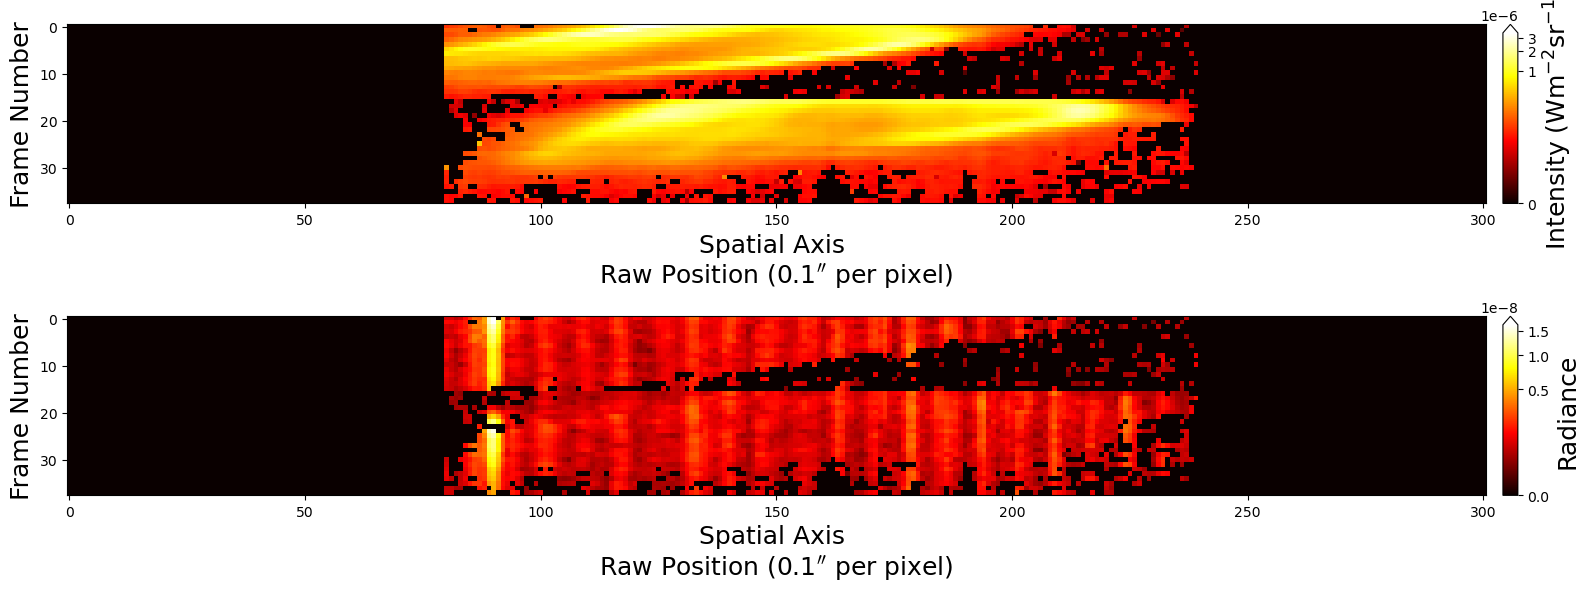

In [8]:
fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_radiance, cmap="hot", norm=colors.PowerNorm(gamma=0.2))
plt.xlabel('Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)', fontsize=18)
plt.ylabel('Frame Number', fontsize=18)
# plt.title('a) H$_3^{+}$ - Intensity', loc='left', fontsize=18)
plt.colorbar(extend='max', aspect=12, pad=0.01).set_label(label='Intensity (Wm$^{-2}$sr$^{-1}$)',size=18)

fig.add_subplot(412)
plt.imshow(h3p_radiance_errs, cmap="hot", norm=colors.PowerNorm(gamma=0.4))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

In [9]:
h3p_dens = fits.open("h3p_dens.fits", ignore_missing_end=True)[0].data
h3p_dens_errs = fits.open("h3p_dens_errs.fits", ignore_missing_end=True)[0].data

h3p_temp = fits.open("h3p_temp.fits", ignore_missing_end=True)[0].data
h3p_temp_errs = fits.open("h3p_temp_errs.fits", ignore_missing_end=True)[0].data

h3p_rad = fits.open("h3p_radiance.fits", ignore_missing_end=True)[0].data
h3p_rad_errs = fits.open("h3p_radiance_errs.fits", ignore_missing_end=True)[0].data


# h3p dens
h3p_dens1 = np.roll(h3p_dens[:6], 23, axis=1)
h3p_dens2 = np.roll(h3p_dens[6:11], 22, axis=1)
h3p_dens3 = np.roll(h3p_dens[11:16], 30, axis=1)
h3p_dens4 = np.roll(h3p_dens[16:27], -14, axis=1)
h3p_dens5 = np.roll(h3p_dens[27:], -14, axis=1)

h3p_dens_shifted = np.vstack((h3p_dens1, h3p_dens2, h3p_dens3, h3p_dens4, h3p_dens5))

for i in range(16):
    h3p_dens_shifted[i, :] = scipy.ndimage.shift(h3p_dens_shifted[i, :], i * 6, order=5)

h3p_dens_flipped = np.flip(h3p_dens_shifted, axis=1)

# h3p dens errs
h3p_dens_errs1 = np.roll(h3p_dens_errs[:6], 23, axis=1)
h3p_dens_errs2 = np.roll(h3p_dens_errs[6:11], 22, axis=1)
h3p_dens_errs3 = np.roll(h3p_dens_errs[11:16], 30, axis=1)
h3p_dens_errs4 = np.roll(h3p_dens_errs[16:27], -14, axis=1)
h3p_dens_errs5 = np.roll(h3p_dens_errs[27:], -14, axis=1)

h3p_dens_errs_shifted = np.vstack((h3p_dens_errs1, h3p_dens_errs2, h3p_dens_errs3, h3p_dens_errs4, h3p_dens_errs5))

for i in range(16):
    h3p_dens_errs_shifted[i, :] = scipy.ndimage.shift(h3p_dens_errs_shifted[i, :], i * 6, order=5)

h3p_dens_errs_flipped = np.flip(h3p_dens_errs_shifted, axis=1)

# h3p temp
h3p_temp1 = np.roll(h3p_temp[:6], 23, axis=1)
h3p_temp2 = np.roll(h3p_temp[6:11], 22, axis=1)
h3p_temp3 = np.roll(h3p_temp[11:16], 30, axis=1)
h3p_temp4 = np.roll(h3p_temp[16:27], -14, axis=1)
h3p_temp5 = np.roll(h3p_temp[27:], -14, axis=1)

h3p_temp_shifted = np.vstack((h3p_temp1, h3p_temp2, h3p_temp3, h3p_temp4, h3p_temp5))

for i in range(16):
    h3p_temp_shifted[i, :] = scipy.ndimage.shift(h3p_temp_shifted[i, :], i * 6, order=5)

h3p_temp_flipped = np.flip(h3p_temp_shifted, axis=1)

# h3p temp errs
h3p_temp_errs1 = np.roll(h3p_temp_errs[:6], 23, axis=1)
h3p_temp_errs2 = np.roll(h3p_temp_errs[6:11], 22, axis=1)
h3p_temp_errs3 = np.roll(h3p_temp_errs[11:16], 30, axis=1)
h3p_temp_errs4 = np.roll(h3p_temp_errs[16:27], -14, axis=1)
h3p_temp_errs5 = np.roll(h3p_temp_errs[27:], -14, axis=1)

h3p_temp_errs_shifted = np.vstack((h3p_temp_errs1, h3p_temp_errs2, h3p_temp_errs3, h3p_temp_errs4, h3p_temp_errs5))

for i in range(16):
    h3p_temp_errs_shifted[i, :] = scipy.ndimage.shift(h3p_temp_errs_shifted[i, :], i * 6, order=5)

h3p_temp_errs_flipped = np.flip(h3p_temp_errs_shifted, axis=1)

# h3p rad
h3p_rad1 = np.roll(h3p_rad[:6], 23, axis=1)
h3p_rad2 = np.roll(h3p_rad[6:11], 22, axis=1)
h3p_rad3 = np.roll(h3p_rad[11:16], 30, axis=1)
h3p_rad4 = np.roll(h3p_rad[16:27], -14, axis=1)
h3p_rad5 = np.roll(h3p_rad[27:], -14, axis=1)

h3p_rad_shifted = np.vstack((h3p_rad1, h3p_rad2, h3p_rad3, h3p_rad4, h3p_rad5))

for i in range(16):
    h3p_rad_shifted[i, :] = scipy.ndimage.shift(h3p_rad_shifted[i, :], i * 6, order=5)

h3p_rad_flipped = np.flip(h3p_rad_shifted, axis=1)

# h3p rad errs
h3p_rad_errs1 = np.roll(h3p_rad_errs[:6], 23, axis=1)
h3p_rad_errs2 = np.roll(h3p_rad_errs[6:11], 22, axis=1)
h3p_rad_errs3 = np.roll(h3p_rad_errs[11:16], 30, axis=1)
h3p_rad_errs4 = np.roll(h3p_rad_errs[16:27], -14, axis=1)
h3p_rad_errs5 = np.roll(h3p_rad_errs[27:], -14, axis=1)

h3p_rad_errs_shifted = np.vstack((h3p_rad_errs1, h3p_rad_errs2, h3p_rad_errs3, h3p_rad_errs4, h3p_rad_errs5))

for i in range(16):
    h3p_rad_errs_shifted[i, :] = scipy.ndimage.shift(h3p_rad_errs_shifted[i, :], i * 6, order=5)

h3p_rad_errs_flipped = np.flip(h3p_rad_errs_shifted, axis=1)


h3p_dens_errs_flipped[h3p_dens_errs_flipped > 1e20] = np.nan
h3p_dens_errs_flipped[h3p_dens_errs_flipped < 1e10] = np.nan
h3p_dens_flipped[np.isnan(h3p_dens_errs_flipped)] = np.nan

h3p_temp_errs_flipped[h3p_temp_errs_flipped > 400] = np.nan
h3p_temp_errs_flipped[h3p_temp_errs_flipped < 1] = np.nan
h3p_temp_flipped[np.isnan(h3p_temp_errs_flipped)] = np.nan

h3p_rad_errs_flipped[h3p_rad_errs_flipped > 1e-1] = np.nan
h3p_rad_errs_flipped[h3p_rad_errs_flipped < 1e-13] = np.nan
h3p_rad_flipped[np.isnan(h3p_rad_errs_flipped)] = np.nan

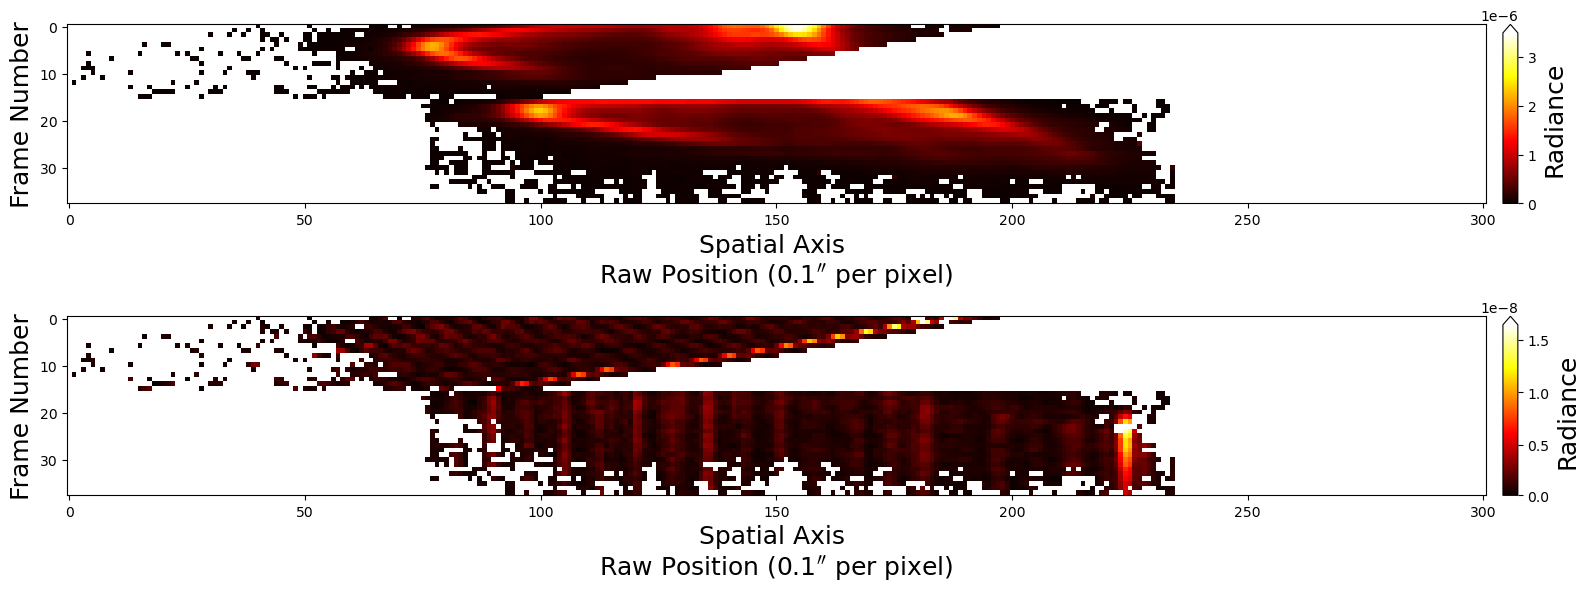

In [10]:
fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_rad_flipped, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

fig.add_subplot(412)
plt.imshow(h3p_rad_errs_flipped, cmap="hot", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Radiance", size=18)

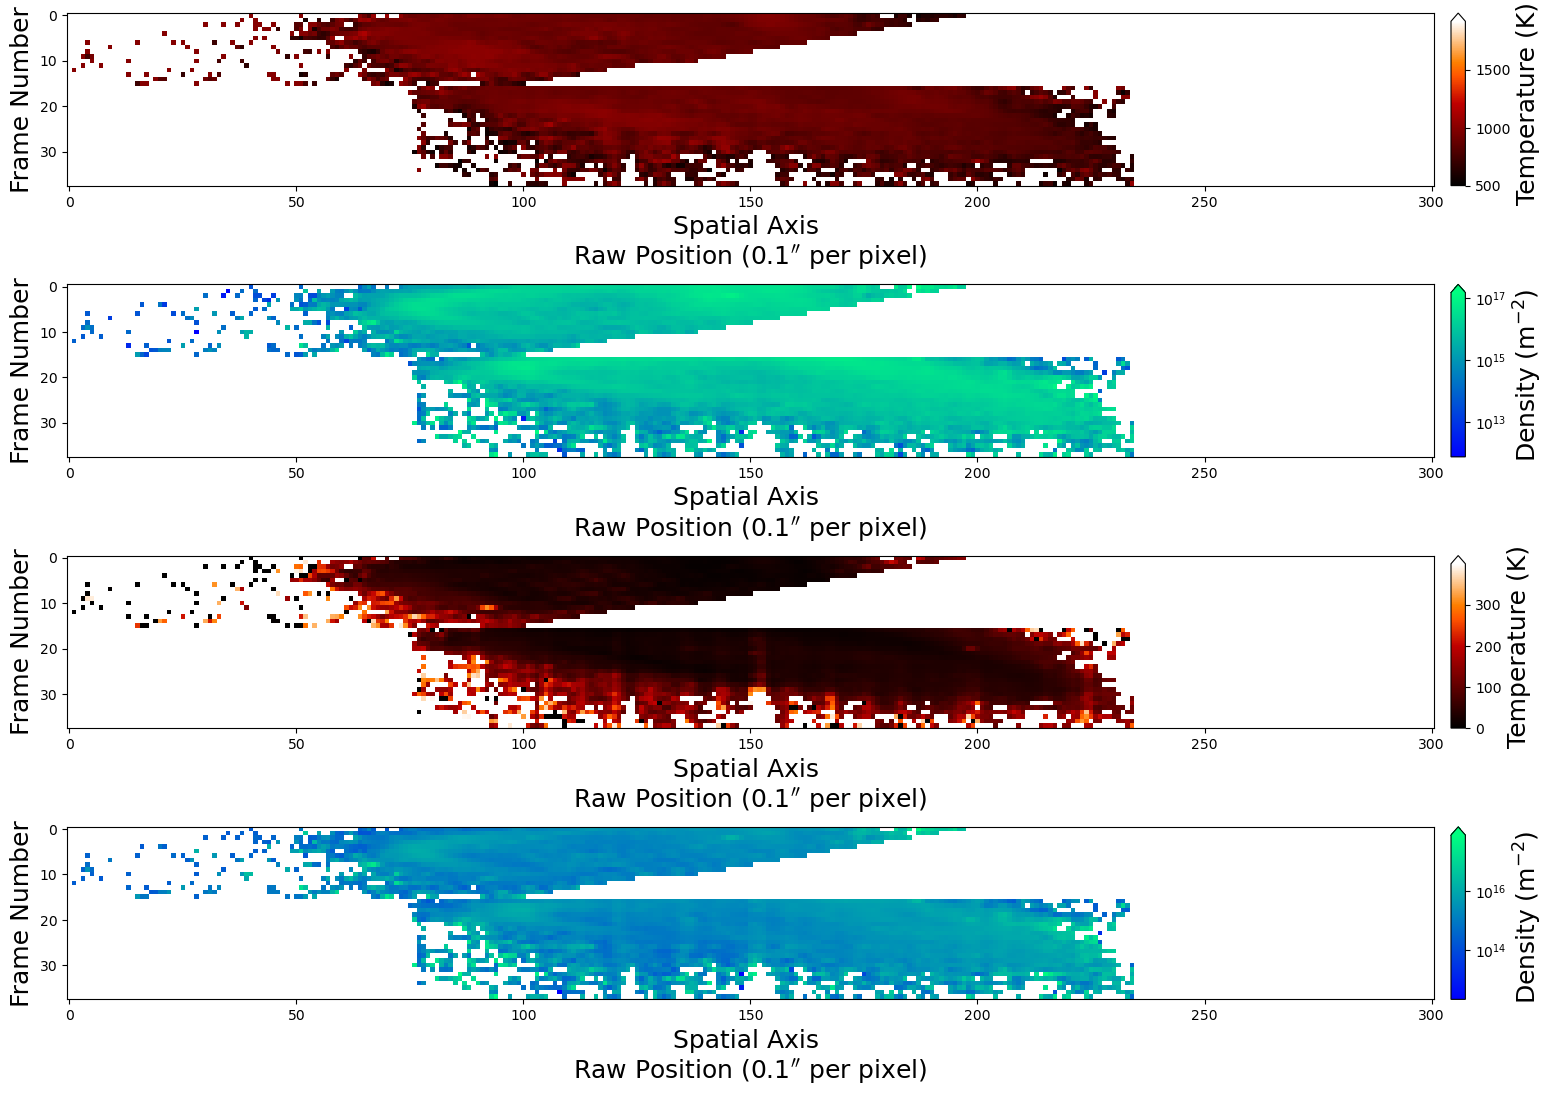

In [11]:
fig = plt.figure(figsize=(18, 11), tight_layout=True)

fig.add_subplot(411)
plt.imshow(h3p_temp_flipped, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(412)
plt.imshow(h3p_dens_flipped, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

fig.add_subplot(413)
plt.imshow(h3p_temp_errs_flipped, cmap="gist_heat", norm=colors.PowerNorm(gamma=1))
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Temperature (K)", size=18)

fig.add_subplot(414)
plt.imshow(h3p_dens_errs_flipped, cmap="winter", norm=colors.LogNorm())
plt.xlabel("Spatial Axis \nRaw Position (0.1$^{\prime\prime}$ per pixel)", fontsize=18)
plt.ylabel("Frame Number", fontsize=18)
# plt.title('a) H$_3^{+}$ - tempensity', loc='left', fontsize=18)
plt.colorbar(extend="max", aspect=12, pad=0.01).set_label(label="Density (m$^{-2}$)", size=18)

In [ ]:
fig = plt.figure(figsize=(18, 6), tight_layout=True)

rgb_img = np.zeros((38, 301, 3))
rgb_img[:, :, 0] = (h3p_temp - 700) / 400
rgb_img[:, :, 1] = (h3p_dens) / 8e16
rgb_img[:, :, 2] = (eff_ion_drift + 7.5) / 16
# rgb_img[:,:,2] = (h2_h3p_flow ) / 3


fig.add_subplot(211)
plt.imshow(rgb_img)

In [12]:
hdu1 = fits.PrimaryHDU(h3p_dens_flipped)
hdu1.writeto("h3p_dens_v2.fits", overwrite=True)

hdu2 = fits.PrimaryHDU(h3p_temp_flipped)
hdu2.writeto("h3p_temp_v2.fits", overwrite=True)

hdu3 = fits.PrimaryHDU(h3p_dens_errs_flipped)
hdu3.writeto("h3p_dens_errs_v2.fits", overwrite=True)

hdu4 = fits.PrimaryHDU(h3p_temp_errs_flipped)
hdu4.writeto("h3p_temp_errs_v2.fits", overwrite=True)

hdu5 = fits.PrimaryHDU(h3p_rad_flipped)
hdu5.writeto("h3p_radiance_v2.fits", overwrite=True)

hdu6 = fits.PrimaryHDU(h3p_rad_errs_flipped)
hdu6.writeto("h3p_radiance_errs_v2.fits", overwrite=True)